# 1 Entendimento do Negócio



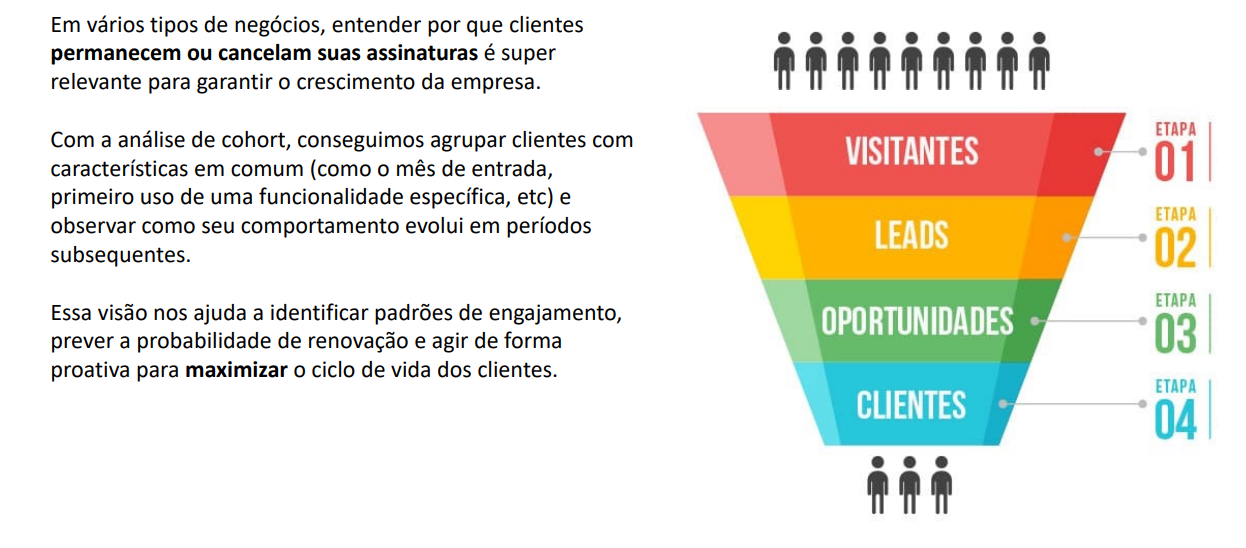


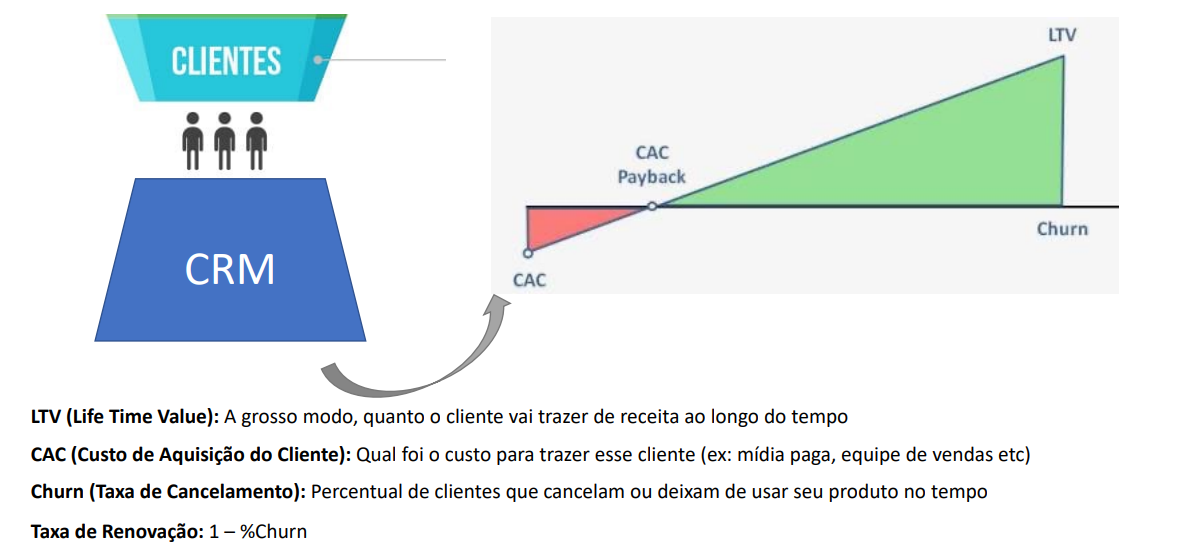

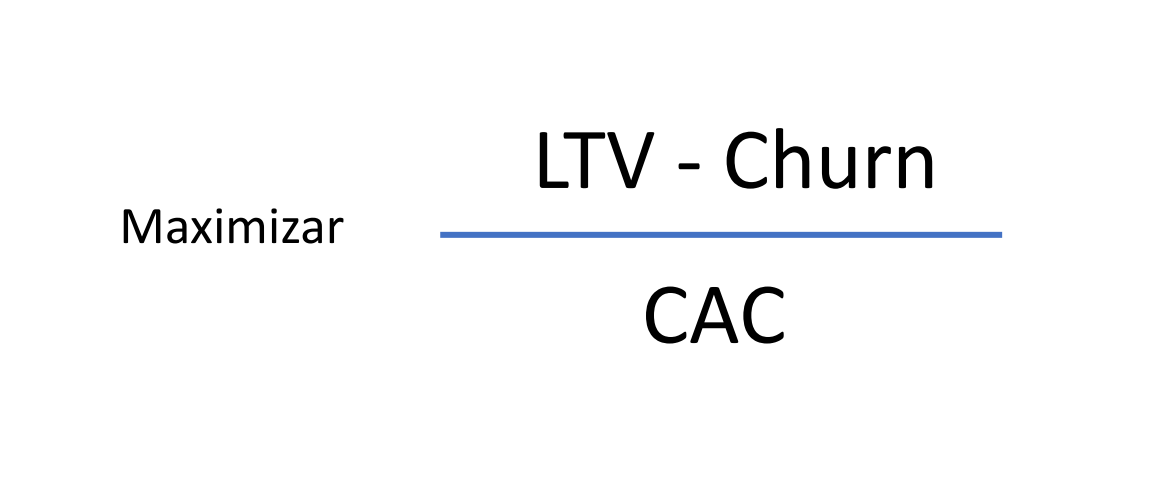

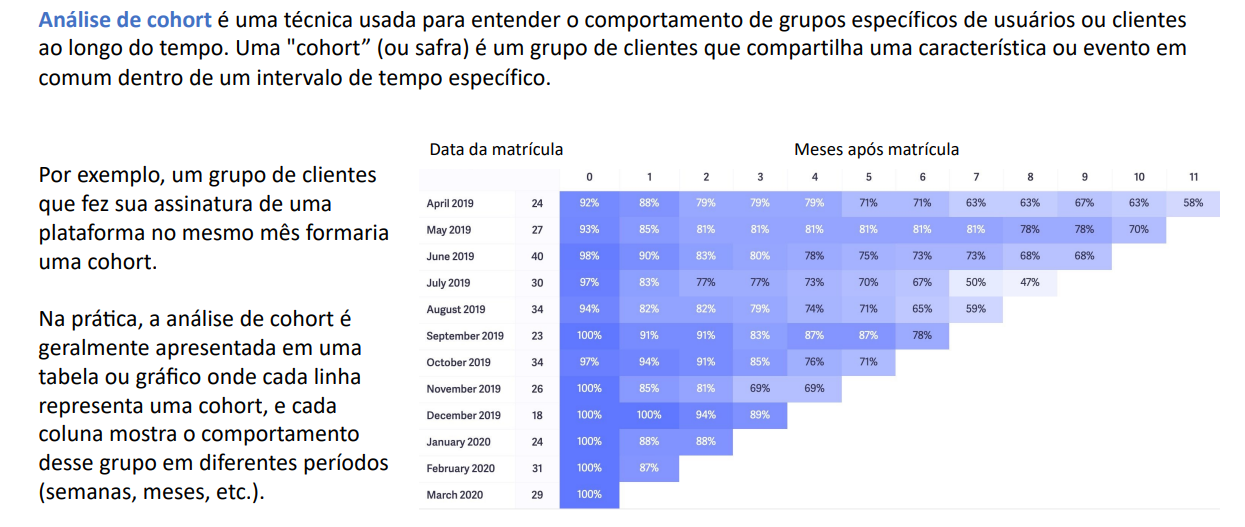


Objetivos do trabalho:


A plataforma MYK Academy é uma plataforma educacional com cursos de relacionamento com clientes. A empresa
veem se preocupando com o baixo uso da plataforma ao longo dos meses. Para entender o perfil de risco do cliente
com maior chance de churn, a área de produtos educacionais gostaria de entender e classificar o cliente com o
risco de churn para criar políIcas de engajamento personalizadas, maximizando o uso e a renovação da assinatura.
Realizar uma análise de cohort dos alunos da plataforma,Propor planos de ação de melhorias e maximização da renovação.

Obs: Um cliente é classificado como Churn quando fica 60 dias sem acesso ao portal.

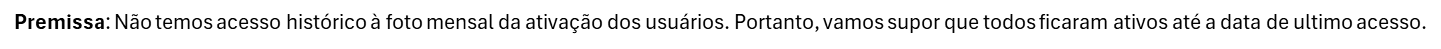

Referente a coluna data da Referência foi utlizado o dia:29/10/2024

## 1.1 Análise SWOT


– MYK Academy

**Strengths (Forças)**

Plataforma educacional segmentada em relacionamento com clientes, nicho valioso no mercado corporativo.

Possibilidade de usar a data do último acesso como proxy de engajamento, permitindo classificação de churn.

Capacidade de construir modelos de probabilidade de renovação mesmo sem série temporal completa.

Potencial de gerar insights com dados agregados e análises de cohort baseadas no último acesso.

**Weaknesses (Fraquezas) **

Falta de dados históricos de uso mês a mês, limitando a precisão da análise de engajamento ao longo do tempo.

Risco de subestimar ou superestimar o churn, já que o comportamento anterior ao último acesso é desconhecido.

Estratégias de retenção podem ser menos eficazes sem entender a jornada completa do usuário.

**Opportunities (Oportunidades)**

Criar uma estrutura de coleta de dados mais robusta para registrar eventos de uso contínuo.

Aplicar machine learning supervisionado com base em variáveis como tempo desde o último acesso, tipo de curso, e perfil do cliente.

Enviar comunicações automáticas baseadas no tempo desde o último acesso (ex: 30, 45, 60 dias).

Desenvolver produtos complementares que incentivem o retorno à plataforma.


**Threats (Ameaças)**

Sem um histórico detalhado, decisões baseadas em dados podem conter viés de interpretação.

Dificuldade em identificar perfis comportamentais diferenciados, como alunos que acessam só no início da assinatura.

Concorrência com plataformas mais interativas, que usam dados de navegação mais completos para retenção.

## 1.2 Análise SMART






**Specific (Específico)**

Identificar usuários com maior tempo desde o último acesso e segmentar o risco de churn com base nessa métrica.

**Measurable (Mensurável)**

Reduzir o percentual de clientes classificados como churn (inativos por 60 dias) em 15% nos próximos 3 meses.

**Achievable (Atingível)**

Desenvolver alertas e fluxos de comunicação automática baseados na diferença entre hoje e o último acesso.

**Relevant (Relevante)**

Compreender e reengajar os usuários inativos é essencial para aumentar a taxa de renovação da assinatura.

**Time-bound (Temporal)**

Implantar o modelo de classificação de churn e plano de reengajamento até o final do próximo mês.

# 2.Entendimento dos Dados

In [4]:
from datetime import datetime, timedelta
from IPython.display import display, HTML
from datetime import datetime
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
import pandas as pd
import webbrowser
df = pd.read_excel('/content/1. base_cohort.xlsx', sheet_name='base_cohort (2)')
print(df.head())
df.info()
df.shape
df.columns

  Id_Cliente Data_Inscricao Data_Ultimo_Acesso  Data do Cohort  \
0  Id_000001     2023-08-25         2024-08-20          202308   
1  Id_000002     2023-10-26         2024-09-16          202310   
2  Id_000004     2024-07-25         2024-09-13          202407   
3  Id_000005     2024-05-06         2024-09-02          202405   
4  Id_000006     2024-05-22         2024-06-19          202405   

  Data da Referência  Dias de ultimo acesso  Churn?  
0         2024-10-31                     72       1  
1         2024-10-31                     45       0  
2         2024-10-31                     48       0  
3         2024-10-31                     59       0  
4         2024-10-31                    134       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1343 entries, 0 to 1342
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Id_Cliente             1343 non-null   object     

Index(['Id_Cliente', 'Data_Inscricao', 'Data_Ultimo_Acesso', 'Data do Cohort',
       'Data da Referência', 'Dias de ultimo acesso', 'Churn?'],
      dtype='object')

*1. Taxa de Churn:*

A coluna "Churn?" indica se um cliente foi considerado como tendo "churned" (isto é, deixado de usar o serviço). A análise dessa coluna pode ajudar a calcular a taxa de churn.
Considerando que 1 representa churn, você pode calcular a proporção de clientes que deixaram de usar o serviço.

*2. Tempo de Retenção: *


A coluna "Dias de ultimo acesso" mostra quantos dias se passaram desde o último acesso do cliente até a "Data da Referência".
Essa métrica pode ser usada para avaliar a atividade dos clientes ao longo do tempo.

*3. Análise de Cohort:*

A "Data do Cohort" indica em que mês os clientes se inscreveram. Isso permite realizar análises de cohort para entender a retenção ao longo do tempo.
Você pode comparar diferentes cohorts para ver quais grupos de inscrição têm melhor retenção ou engajamento.

*4. Comportamento de Acesso:*

Comparar "Data_Inscricao" e "Data_Ultimo_Acesso" fornece insights sobre o comportamento de uso dos clientes.
Clientes que têm uma grande diferença entre a data de inscrição e o último acesso podem indicar desengajamento.

*5. Dados Temporais:*

A análise das datas pode ajudar a identificar padrões sazonais ou tendências ao longo do tempo.
Examinar o número de dias desde o último acesso em relação ao churn pode revelar o tempo típico de inatividade antes do churn.


*Colunas e Tipos de Dados:*

Id_Cliente

Tipo: object

Descrição: Identificação dos clientes.

Data_Inscricao


Tipo: datetime64[ns]

Descrição: Data de inscrição do cliente.

Data_Ultimo_Acesso



Tipo: datetime64[ns]

Descrição: Data do último acesso do cliente.

Data do Cohort

Tipo: int64

Descrição: Mês e ano de inscrição do cliente (formato AAAAMM).

Data da Referência

Tipo: datetime64[ns]

Descrição: Data de referência para análise.

Dias de ultimo acesso

Tipo: int64

Descrição: Número de dias desde o último acesso até a data de referência.
Churn?


Tipo: int64
Descrição: Indicador de churn (1 para churn, 0 para não churn).

Resumo do DataFrame:

Total de entradas: 1343

# 3.Entendimento dos Cohort

In [16]:
# Parâmetros
arquivo_entrada = '/content/1. base_cohort.xlsx'
dias_para_churn = 60  # dias
data_referencia = datetime(2024, 10, 29)

def analise_cohort_completa(arquivo_entrada):
    # Lendo o arquivo Excel
    df = pd.read_excel(arquivo_entrada)

    # Criando o cohort
    df['Cohort'] = df['Data_Inscricao'].dt.to_period('M')

    # Função para gerar meses ativos entre duas datas
    def gerar_meses_ativos(row):
        meses_ativos = []
        data_inicio = row['Data_Inscricao']
        data_fim = row['Data_Ultimo_Acesso']

        if (data_referencia - data_fim).days > dias_para_churn:
            data_fim = data_fim - timedelta(days=dias_para_churn)

        data_atual_mes = data_inicio
        while data_atual_mes <= data_fim:
            meses_ativos.append(pd.to_datetime(data_atual_mes).to_period('M'))
            data_atual_mes += pd.offsets.MonthEnd(1)

        return meses_ativos

    df['Meses_Ativos'] = df.apply(gerar_meses_ativos, axis=1)

    # Criando matriz de cohort
    cohorts = []
    for nome, grupo in df.groupby('Cohort'):
        for i in range(13):
            mes_analise = nome + i
            ativos = sum(1 for _, row in grupo.iterrows() if mes_analise in row['Meses_Ativos'])
            cohorts.append({
                'Cohort': nome,
                'Mes': i,
                'Usuarios_Ativos': ativos
            })

    cohort_df = pd.DataFrame(cohorts)
    matriz_usuarios = cohort_df.pivot_table(index='Cohort', columns='Mes', values='Usuarios_Ativos')

    pd.set_option('display.width', 200)
    pd.set_option('display.max_columns', 20)

    print("\n=== Matriz de Usuários Ativos ===")
    print(matriz_usuarios.fillna(0).astype(int))

    # Total de usuários ativos por mês
    usuarios_por_mes = {}
    todos_meses = sorted(set([mes for row in df['Meses_Ativos'] for mes in row]))

    for mes in todos_meses:
        usuarios_por_mes[mes] = sum(1 for _, row in df.iterrows() if mes in row['Meses_Ativos'])

    df_usuarios_mes = pd.DataFrame.from_dict(usuarios_por_mes, orient='index', columns=['Usuarios_Ativos'])
    df_usuarios_mes.index.name = 'Mês'

    # Quantidade de inscrições por mês (Data do Cohort)
    inscricoes_por_mes = df['Data_Inscricao'].dt.to_period('M').value_counts().sort_index()
    df_usuarios_mes['Data do Cohort'] = df_usuarios_mes.index.map(inscricoes_por_mes).fillna(0).astype(int)

    # ✅ Percentual de ativos sobre o total do cohort
    df_usuarios_mes['% Ativos / Cohort'] = (
        df_usuarios_mes['Usuarios_Ativos'] / df_usuarios_mes['Data do Cohort']
    ).replace([float('inf'), -float('inf')], 0).fillna(0) * 100

    df_usuarios_mes['% Ativos / Cohort'] = df_usuarios_mes['% Ativos / Cohort'].round(2)

    print("\n=== Usuários Ativos por Mês + Data do Cohort + % Ativos ===")
    print(df_usuarios_mes)

# Executando a função
try:
    analise_cohort_completa(arquivo_entrada)
except Exception as e:
    print("\nErro:", e)



=== Matriz de Usuários Ativos ===
Mes       0    1    2    3    4    5    6    7   8   9   10  11  12
Cohort                                                             
2023-08  100   96   95   95   93   93   89   89  83  71  44  44  43
2023-09   44   40   39   39   37   35   32   26  21  14  14  14   0
2023-10  181  172  163  160  154  141  129  111  77  77  75   0   0
2023-11   37   36   34   33   33   31   29   15  14  13   0   0   0
2023-12   95   91   90   85   72   60   42   40  38   0   0   0   0
2024-01   50   49   46   40   30   20   19   18   0   0   0   0   0
2024-02   65   57   50   45   30   29   29    0   0   0   0   0   0
2024-03   67   59   53   42   42   41    0    0   0   0   0   0   0
2024-04   57   51   35   35   35    0    0    0   0   0   0   0   0
2024-05   80   61   61   57    0    0    0    0   0   0   0   0   0
2024-06   97   83   83    0    0    0    0    0   0   0   0   0   0
2024-07  124  122    0    0    0    0    0    0   0   0   0   0   0
2024-08  181 

In [21]:
# Parameters
arquivo_entrada = '/content/1. base_cohort.xlsx'  # Adjust path as needed
dias_para_churn = 60  # days
data_referencia = datetime(2024, 10, 29)

def analise_cohort_completa(arquivo_entrada):
    # Load data
    df = pd.read_excel(arquivo_entrada)

    # Create Cohort field (registration month)
    df['Cohort'] = df['Data_Inscricao'].dt.strftime('%Y-%m')

    # Function to generate active months
    def gerar_meses_ativos(row):
        meses_ativos = []
        data_inicio = row['Data_Inscricao']
        data_fim = row['Data_Ultimo_Acesso']

        # Check if user is inactive (churned)
        if (data_referencia - data_fim).days > dias_para_churn:
            data_fim = data_fim - timedelta(days=dias_para_churn)

        # Generate all months between registration and last access
        data_atual_mes = data_inicio
        while data_atual_mes <= data_fim:
            meses_ativos.append(pd.to_datetime(data_atual_mes).strftime('%Y-%m'))
            # Move to next month
            data_atual_mes += pd.offsets.MonthEnd(1)

        return meses_ativos

    # Apply function to calculate active months
    df['Meses_Ativos'] = df.apply(gerar_meses_ativos, axis=1)

    # Generate cohort data
    cohorts = []
    for nome, grupo in df.groupby('Cohort'):
        tamanho_cohort = len(grupo)

        # For each month after registration (0 to 12)
        for i in range(13):
            # Calculate month to analyze
            cohort_period = pd.to_datetime(nome).strftime('%Y-%m')
            mes_analise = (pd.to_datetime(cohort_period) + pd.DateOffset(months=i)).strftime('%Y-%m')

            # Count active users in this month
            ativos = sum(1 for _, row in grupo.iterrows() if mes_analise in row['Meses_Ativos'])

            cohorts.append({
                'Cohort': nome,
                'Mes': i,
                'Usuarios_Ativos': ativos,
                'Tamanho_Cohort': tamanho_cohort
            })

    # Convert to DataFrame
    cohort_df = pd.DataFrame(cohorts)

    # Calculate activation/retention percentage
    cohort_df['Ativacao_%'] = (cohort_df['Usuarios_Ativos'] / cohort_df['Tamanho_Cohort']) * 100
    cohort_df['Ativacao_%'] = cohort_df['Ativacao_%'].round(0).astype(int)

    # Create activation matrix
    matriz_ativacao = cohort_df.pivot(index='Cohort', columns='Mes', values='Ativacao_%')

    # Replace zeros with empty strings
    matriz_ativacao = matriz_ativacao.replace(0, np.nan)

    # Calculate column (month) averages
    media_por_mes = matriz_ativacao.mean().round(0).astype(int)

    # Add registration counts next to matrix
    qtd_inscricoes = df['Cohort'].value_counts().sort_index()

    # Create final display dataframe
    matriz_final = matriz_ativacao.copy()
    matriz_final.insert(0, 'Qte de Inscrições', qtd_inscricoes)

    # Add average row at bottom
    matriz_final.loc['Média'] = [qtd_inscricoes.sum()] + media_por_mes.tolist()

    # Rename columns
    matriz_final.columns = ['Qte de Inscrições'] + [f'Mês {i}' for i in range(13)]

    # Replace NaN with empty strings
    matriz_final = matriz_final.fillna('')

    return matriz_final, df

def exibir_tabela_colorida_exata(matriz_final):
    # Function to apply color based on value
    def colorir_celulas(val):
        if val == '' or pd.isna(val):  # Check for both empty string and NaN
            return ''
        if val >= 80:
            return 'background-color: #ADD8E6'  # Light blue
        elif val >= 60:
            return 'background-color: #90EE90'  # Light green
        elif val >= 50:
            return 'background-color: #FFCCCB'  # Light pink
        else:
            return 'background-color: #FF9999'  # Darker pink

    # Apply styling
    styled = matriz_final.style

    # Format numbers - empty cells will remain empty
    styled = styled.format({
        'Qte de Inscrições': lambda x: '' if x == '' else '{:.0f}'.format(x),
        **{col: lambda x: '' if x == '' else '{:.0f}%'.format(x)
           for col in matriz_final.columns if col != 'Qte de Inscrições'}
    })

    # Apply conditional coloring only to percentage columns
    for col in matriz_final.columns:
        if col != 'Qte de Inscrições':
            styled = styled.map(lambda x: colorir_celulas(x) if x != '' else '', subset=col)

    # Highlight specific rows (2024-05 and 2024-06)
    def highlight_rows(row):
        if row.name in ['2024-05', '2024-06']:
            return ['background-color: yellow'] * len(row)
        return [''] * len(row)

    styled = styled.apply(highlight_rows, axis=1)

    # Table style
    styled = styled.set_table_styles([
        {'selector': 'table', 'props': [('border-collapse', 'collapse')]},
        {'selector': 'td, th', 'props': [('border', '1px solid black'), ('padding', '5px')]},
        {'selector': 'th', 'props': [('background-color', 'yellow')]}
    ])

    return styled

# Execute analysis
try:
    matriz_final, df_original = analise_cohort_completa(arquivo_entrada)

    # Display formatted table
    styled_df = exibir_tabela_colorida_exata(matriz_final)
    display(styled_df)

except Exception as e:
    print("\nError:", e)

,Qte de Inscrições,Mês 0,Mês 1,Mês 2,Mês 3,Mês 4,Mês 5,Mês 6,Mês 7,Mês 8,Mês 9,Mês 10,Mês 11,Mês 12
Cohort,,,,,,,,,,,,,,
2023-08,104,96%,92%,91%,91%,89%,89%,86%,86%,80%,68%,42%,42%,41%
2023-09,45,98%,89%,87%,87%,82%,78%,71%,58%,47%,31%,31%,31%,
2023-10,192,94%,90%,85%,83%,80%,73%,67%,58%,40%,40%,39%,,
2023-11,46,80%,78%,74%,72%,72%,67%,63%,33%,30%,28%,,,
2023-12,100,95%,91%,90%,85%,72%,60%,42%,40%,38%,,,,
2024-01,56,89%,88%,82%,71%,54%,36%,34%,32%,,,,,
2024-02,69,94%,83%,72%,65%,43%,42%,42%,,,,,,
2024-03,75,89%,79%,71%,56%,56%,55%,,,,,,,
2024-04,68,84%,75%,51%,51%,51%,,,,,,,,


**Analisando a tabela de cohort, podemos extrair os seguintes insights sobre a retenção de usuários**:


*1. Retenção Geral (Média)*

Primeiro Mês (Mês 0): 88% de retenção (alta adesão inicial)

Queda Acelerada: A retenção cai para 81% no Mês 1 e continua declinando ao longo do tempo.

Retenção de Longo Prazo (Mês 12): Apenas 41% dos usuários permanecem ativos após 1 ano.



*2. Tendências por Cohort*


Cohorts Antigas (2023-08 a 2023-12)

Alta Retenção Inicial: 90%+ nos primeiros meses.

Queda Gradual: Retenção cai para ~40-50% após 6 meses.

Exemplo: A cohort 2023-08 manteve 41% de retenção no Mês 12.

Cohorts Recentes (2024-05 a 2024-08)

Retenção Mais Baixa:

2024-06: 75% no Mês 0 vs. 64% no Mês 2.

2024-08: 85% no Mês 0 (dados limitados, mas abaixo da média histórica).

Possível Problema Recente: Queda mais acentuada nos primeiros meses comparado a cohorts anteriores.


*3. Pontos Críticos de Churn*

Primeiros 3 Meses: Queda de ~15-20% (ex: 88% → 76% na média).

Mês 6: Retenção cai para ~58% (quase metade dos usuários saem em 6 meses).

Mês 12: Apenas cohorts antigas têm dados, com retenção ~40%.

*4. Insights Específicos*

Cohort 2023-11: Teve a menor retenção inicial (80%) e uma queda brusca no Mês 7 (33%), indicando possível problema pontual (ex: mudança no produto ou suporte).

Cohort 2024-05 e 2024-06: Retenção no Mês 1 (~66-64%) abaixo da média histórica (81%), sugerindo um declínio recente na qualidade da aquisição ou experiência do usuário.

Cohort 2024-07: Retenção inicial (81%) alinhada à média, mas precisa ser monitorada.

*5. Recomendações*

Investigar a Queda Recente (2024-05 em diante):

Verificar se houve mudanças na aquisição de usuários ou no produto.

Analisar feedbacks de usuários que saíram nos primeiros meses.

Foco nos Primeiros 3 Meses:

Melhorar onboarding (ex: tutoriais, suporte proativo) para reduzir churn inicial.

Retenção de Longo Prazo:

Criar programas de engajamento (ex: recompensas, conteúdo exclusivo) para cohorts antigas.

Monitorar Cohort 2024-08:

Apesar da retenção inicial boa (85%), é necessário acompanhar se seguirá a tendência de queda recente.

*Conclusão*

A retenção está enfraquecendo nas cohorts mais recentes, especialmente nos primeiros meses. Ações corretivas devem focar em:

Melhorar a experiência inicial (Mês 0-3).

Identificar causas para a queda acentuada em 2024 (ex: qualidade de aquisição, mudanças no produto).



# 3.1 ANÁLISE FINANCEIRA DE COHORT - MYK ACADEMY





RESULTADOS FINANCEIROS POR COHORT


,Cohort,Alunos,Retenção Usada,Receita,Custo Total,Lucro,ROI,Observação
0,2023-08,104,41.0% (real),63960.0,52000,11960.0,23.0,Dado completo
1,2023-09,45,31.0% (estimado),20925.0,22500,-1575.0,-7.0,Estimado com base no mês 11
2,2023-10,192,39.0% (estimado),112320.0,96000,16320.0,17.0,Estimado com base no mês 10
3,2023-11,46,28.0% (estimado),19320.0,23000,-3680.0,-16.0,Estimado com base no mês 9
4,2023-12,100,38.0% (estimado),57000.0,50000,7000.0,14.0,Estimado com base no mês 8
5,2024-01,56,32.0% (estimado),26880.0,28000,-1120.0,-4.0,Estimado com base no mês 7
6,2024-02,69,42.0% (estimado),43470.0,34500,8970.0,26.0,Estimado com base no mês 6
7,2024-03,75,55.0% (estimado),61875.0,37500,24375.0,65.0,Estimado com base no mês 5
8,2024-04,68,51.0% (estimado),52020.0,34000,18020.0,53.0,Estimado com base no mês 4
9,2024-05,92,62.0% (estimado),85560.0,46000,39560.0,86.0,Estimado com base no mês 3


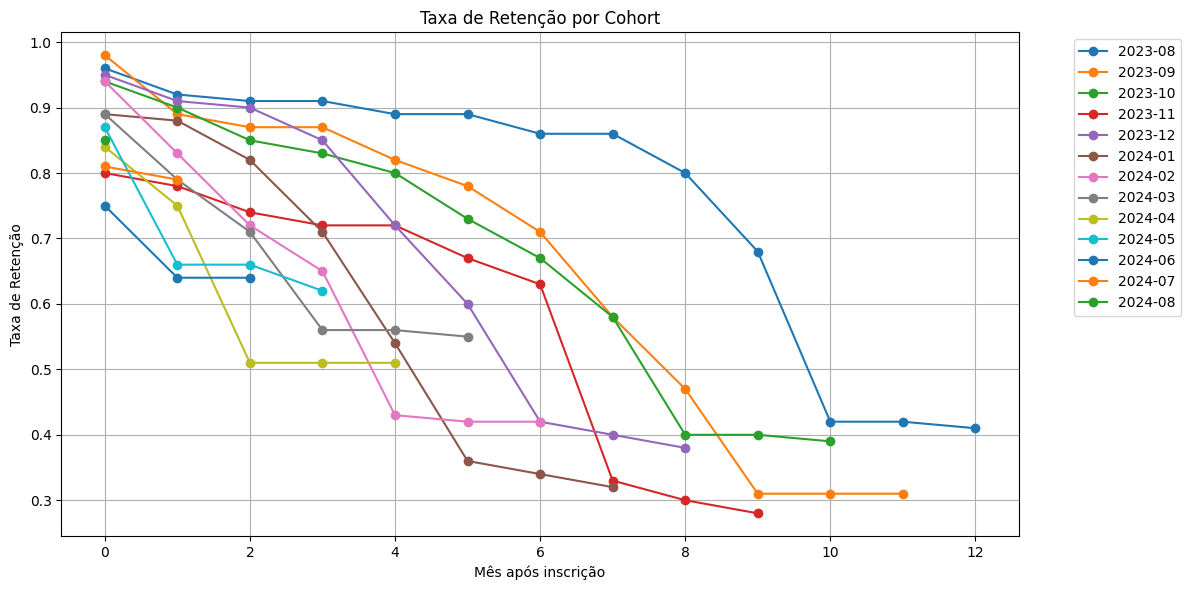


CONCLUSÃO FINANCEIRA

→ ROI MÉDIO (cohorts completas): 23.0%
✅ O modelo ATUAL é viável para cohorts antigas

→ COHORTS RECENTES (dados incompletos):
   2023-09: Retenção estimada em 31.0% (estimado) - Lucro projetado: R$-1,575
   2023-10: Retenção estimada em 39.0% (estimado) - Lucro projetado: R$16,320
   2023-11: Retenção estimada em 28.0% (estimado) - Lucro projetado: R$-3,680
   2023-12: Retenção estimada em 38.0% (estimado) - Lucro projetado: R$7,000
   2024-01: Retenção estimada em 32.0% (estimado) - Lucro projetado: R$-1,120
   2024-02: Retenção estimada em 42.0% (estimado) - Lucro projetado: R$8,970
   2024-03: Retenção estimada em 55.0% (estimado) - Lucro projetado: R$24,375
   2024-04: Retenção estimada em 51.0% (estimado) - Lucro projetado: R$18,020
   2024-05: Retenção estimada em 62.0% (estimado) - Lucro projetado: R$39,560
   2024-06: Retenção estimada em 64.0% (estimado) - Lucro projetado: R$59,340
   2024-07: Retenção estimada em 79.0% (estimado) - Lucro projetado: R$1

In [27]:
"""

O codigo analisa se a assinatura anual de R$1500 está cobrindo
o custo de aquisição de clientes (CAC) de R$500, baseado nos dados
de retenção mensal.
"""

# ========================================
# CONFIGURAÇÃO INICIAL
# ========================================
# Valores importantes do seu negócio
VALOR_ASSINATURA_ANUAL = 1500  # R$ por ano por aluno
CUSTO_AQUISICAO_CLIENTE = 500  # Quanto você gasta para conquistar 1 aluno

# ========================================
# SEUS DADOS DE RETENÇÃO (COHORT)
# ========================================
# Esses são os dados que você enviou na imagem
dados_cohort = {
    'Cohort': ['2023-08', '2023-09', '2023-10', '2023-11', '2023-12',
               '2024-01', '2024-02', '2024-03', '2024-04', '2024-05',
               '2024-06', '2024-07', '2024-08', 'Média'],
    'Inscrições': [104, 45, 192, 46, 100, 56, 69, 75, 68, 92, 129, 154, 213, 1343],
    'Mês 0': [96, 98, 94, 80, 95, 89, 94, 89, 84, 87, 75, 81, 85, 88],
    'Mês 1': [92, 89, 90, 78, 91, 88, 83, 79, 75, 66, 64, 79, None, 81],
    'Mês 2': [91, 87, 85, 74, 90, 82, 72, 71, 51, 66, 64, None, None, 76],
    'Mês 3': [91, 87, 83, 72, 85, 71, 65, 56, 51, 62, None, None, None, 72],
    'Mês 4': [89, 82, 80, 72, 72, 54, 43, 56, 51, None, None, None, None, 67],
    'Mês 5': [89, 78, 73, 67, 60, 36, 42, 55, None, None, None, None, None, 62],
    'Mês 6': [86, 71, 67, 63, 42, 34, 42, None, None, None, None, None, None, 58],
    'Mês 7': [86, 58, 58, 33, 40, 32, None, None, None, None, None, None, None, 51],
    'Mês 8': [80, 47, 40, 30, 38, None, None, None, None, None, None, None, None, 47],
    'Mês 9': [68, 31, 40, 28, None, None, None, None, None, None, None, None, None, 42],
    'Mês 10': [42, 31, 39, None, None, None, None, None, None, None, None, None, None, 37],
    'Mês 11': [42, 31, None, None, None, None, None, None, None, None, None, None, None, 36],
    'Mês 12': [41, None, None, None, None, None, None, None, None, None, None, None, None, 41]
}

# Transforma em tabela (DataFrame)
tabela = pd.DataFrame(dados_cohort)

# ========================================
# FUNÇÃO QUE CALCULA LUCRO POR COHORT
# ========================================
def calcular_lucro(cohort):
    """
    Calcula quanto dinheiro cada grupo (cohort) de alunos gerou.

    Para cohorts com menos de 12 meses, ESTIMAMOS os valores futuros
    usando a retenção do último mês disponível (marcado como "Estimado").
    """
    resultados = {
        'Cohort': cohort['Cohort'],
        'Alunos': cohort['Inscrições'],
        'Custo Total': CUSTO_AQUISICAO_CLIENTE * cohort['Inscrições'],
        'Retenção Real': None,
        'Retenção Usada': None,
        'Receita': None,
        'Lucro': None,
        'ROI': None,
        'Observação': None
    }

    # Verifica se tem dado completo de 12 meses
    if pd.notna(cohort['Mês 12']):
        retencao_real = cohort['Mês 12'] / 100
        resultados['Retenção Real'] = f"{cohort['Mês 12']}%"
        resultados['Retenção Usada'] = f"{cohort['Mês 12']}% (real)"
        resultados['Observação'] = "Dado completo"

    # Se não tiver 12 meses, usa estimativa
    else:
        # Encontra o último mês com dado disponível
        ultimo_mes = 0
        for mes in range(12, -1, -1):
            if f'Mês {mes}' in cohort and pd.notna(cohort[f'Mês {mes}']):
                ultimo_mes = mes
                break

        if ultimo_mes > 0:
            retencao_real = cohort[f'Mês {ultimo_mes}'] / 100
            resultados['Retenção Real'] = f"Dados até mês {ultimo_mes}"
            resultados['Retenção Usada'] = f"{cohort[f'Mês {ultimo_mes}']}% (estimado)"
            resultados['Observação'] = f"Estimado com base no mês {ultimo_mes}"
        else:
            return None  # Não tem dados suficientes

    # Garante que retencao_real sempre tenha um valor
    assert retencao_real is not None, "Erro: retencao_real não foi definida."

    # Cálculos financeiros
    resultados['Receita'] = cohort['Inscrições'] * retencao_real * VALOR_ASSINATURA_ANUAL
    resultados['Lucro'] = resultados['Receita'] - resultados['Custo Total']
    resultados['ROI'] = (resultados['Lucro'] / resultados['Custo Total']) * 100

    return resultados

# ========================================
# PROCESSAMENTO DOS DADOS
# ========================================
# Aplica a função para cada cohort
resultados_financeiros = []
for _, cohort in tabela.iterrows():
    if cohort['Cohort'] == 'Média':
        continue  # Pula a linha de média

    resultado = calcular_lucro(cohort)
    if resultado:
        resultados_financeiros.append(resultado)

# Cria tabela de resultados
resultados_df = pd.DataFrame(resultados_financeiros)

# ========================================
# VISUALIZAÇÃO DOS RESULTADOS
# ========================================
print("\n" + "="*50)
print("RESULTADOS FINANCEIROS POR COHORT")
print("="*50)
display(resultados_df[['Cohort', 'Alunos', 'Retenção Usada', 'Receita', 'Custo Total',
                      'Lucro', 'ROI', 'Observação']])

# ========================================
# GRÁFICO DE RETENÇÃO POR COHORT
# ========================================
plt.figure(figsize=(12, 6))
for _, cohort in tabela[:-1].iterrows():  # Exclui a linha 'Média'
    retencoes = [cohort[f'Mês {i}']/100 for i in range(13)
                if f'Mês {i}' in cohort and pd.notna(cohort[f'Mês {i}'])]
    plt.plot(range(len(retencoes)), retencoes, label=cohort['Cohort'], marker='o')

plt.title('Taxa de Retenção por Cohort')
plt.xlabel('Mês após inscrição')
plt.ylabel('Taxa de Retenção')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Controla a exibição do gráfico
exibir_grafico = True  # Altere para False se não quiser exibir o gráfico
if exibir_grafico:
    plt.show()
else:
    plt.close()  # Fecha a figura sem exibi-la

# ========================================
# CONCLUSÕES E RECOMENDAÇÕES
# ========================================
print("\n" + "="*50)
print("CONCLUSÃO FINANCEIRA")
print("="*50)

# Calcula médias apenas das cohorts completas
cohorts_completas = resultados_df[resultados_df['Observação'] == "Dado completo"]
if not cohorts_completas.empty:
    roi_medio = cohorts_completas['ROI'].mean()
    print(f"\n→ ROI MÉDIO (cohorts completas): {roi_medio:.1f}%")

    if roi_medio > 0:
        print("✅ O modelo ATUAL é viável para cohorts antigas")
    else:
        print("❌ O modelo ATUAL NÃO é viável para cohorts antigas")
else:
    print("\n⚠️ Ainda não há cohorts com 12 meses completos")

# Analisa cohorts recentes
cohorts_recentes = resultados_df[resultados_df['Observação'] != "Dado completo"]
if not cohorts_recentes.empty:
    print("\n→ COHORTS RECENTES (dados incompletos):")
    for _, cohort in cohorts_recentes.iterrows():
        print(f"   {cohort['Cohort']}: Retenção estimada em {cohort['Retenção Usada']} - " +
              f"Lucro projetado: R${cohort['Lucro']:,.0f}")

print("\n" + "="*50)
print("RECOMENDAÇÕES")
print("="*50)
print("1. Cohorts antigas (2023):")
print("   - Verifique se o ROI está adequado para seu negócio")
print("\n2. Cohorts recentes (2024):")
print("   - A retenção parece MAIS BAIXA que as antigas")
print("   - Monitore para ver se a queda continua")
print("\n3. Ações sugeridas:")
print(f"   - Aumentar valor da assinatura para >R$1500")
print(f"   - Reduzir CAC de R$500")
print("   - Melhorar retenção nos primeiros meses")

# 4.0 ANÁLISE DE FORMA SEGMENTADA



1.  Foi fornecido a mesma base com mais dados do clientes.
2.  Agora o churn é calculado se o cliente depois de 12 meses,renovou a assinatura.





In [28]:
df = pd.read_excel('/content/3. base_renovacao.xlsx')
print(df.head())
df.info()
df.shape
df.columns

  Data da Primeira Matrícula  % Uso da Plataforma  Qte de Logins Faixa_Idade                       Área         Cargo Canal de Aquisição  Renovou a assinatura?
0                 2023-06-06                 0.31              0     35 a 39                  Logística      Analista           Facebook                      0
1                 2023-08-01                 0.13             10     30 a 34         Comercial / Vendas  Desempregado            Youtube                      1
2                 2023-07-25                 0.25             28     25 a 29  Administração de Empresas      Analista          Instagram                      1
3                 2023-08-22                 0.33             34     18 a 24  Administração de Empresas      Analista           Linkedin                      0
4                 2023-08-22                 0.17             71     40 a 49  Administração de Empresas    Assistente          Instagram                      0
<class 'pandas.core.frame.DataFrame'>
Ra

Index(['Data da Primeira Matrícula', '% Uso da Plataforma', 'Qte de Logins', 'Faixa_Idade', 'Área', 'Cargo', 'Canal de Aquisição', 'Renovou a assinatura?'], dtype='object')

## 4.1 Informações Gerais do DataFrame
Total de registros (linhas): 1.600

Total de colunas: 8

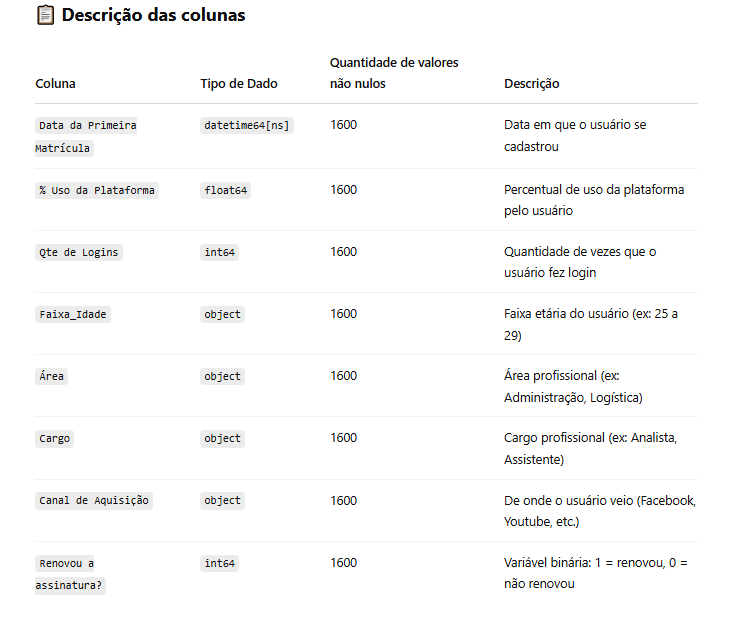



*🔍 Tipos de Dados*

datetime64[ns]: 1 coluna

float64: 1 coluna

int64: 2 colunas

object (categóricas): 4 colunas



# 5.0 Análise Univariada

Nessa parte irei explorar cada variável, afim de entender possíveis causas que colaboram com a Perfomance, além também de descobrir possíveis padrões

## 5.1 Variável Target ou Variável Resposta(Renovou a assinatura?)

In [30]:
# Total

df["Renovou a assinatura?"].value_counts()

,count
Renovou a assinatura?,
0,860
1,740


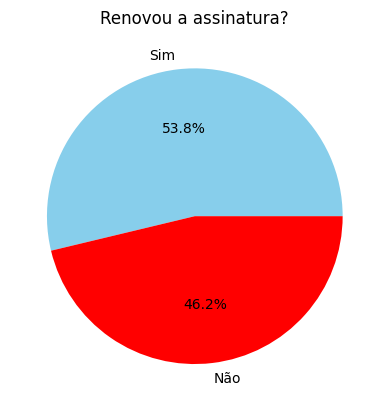

In [31]:
plt.title("Renovou a assinatura?")

valores = df["Renovou a assinatura?"].value_counts()

plt.pie(valores, labels=["Sim", "Não"], colors=["skyblue", "red"], autopct='%1.1f%%')
plt.show()


**Insights sobre a Renovação de Assinatura**


Distribuição de Renovação:

53,8% dos clientes renovaram a assinatura ("Sim")


46,2% não renovaram ("Não")



***Principais Insights***

Taxa de Retenção Positiva: Mais da metade dos clientes (53,8%) optaram por renovar, o que é um bom indicador de satisfação com o serviço.


Oportunidade de Melhoria: Quase metade (46,2%) não renovou, indicando uma área significativa para melhorias na retenção.

## 5.2  Data da Primeira Matrícula

In [32]:
df['Data da Primeira Matrícula'].describe().to_frame().T

,count,mean,min,25%,50%,75%,max
Data da Primeira Matrícula,1600,2023-07-20 15:13:30,2023-02-06 00:00:00,2023-06-16 00:00:00,2023-08-02 00:00:00,2023-08-26 00:00:00,2023-11-24 00:00:00


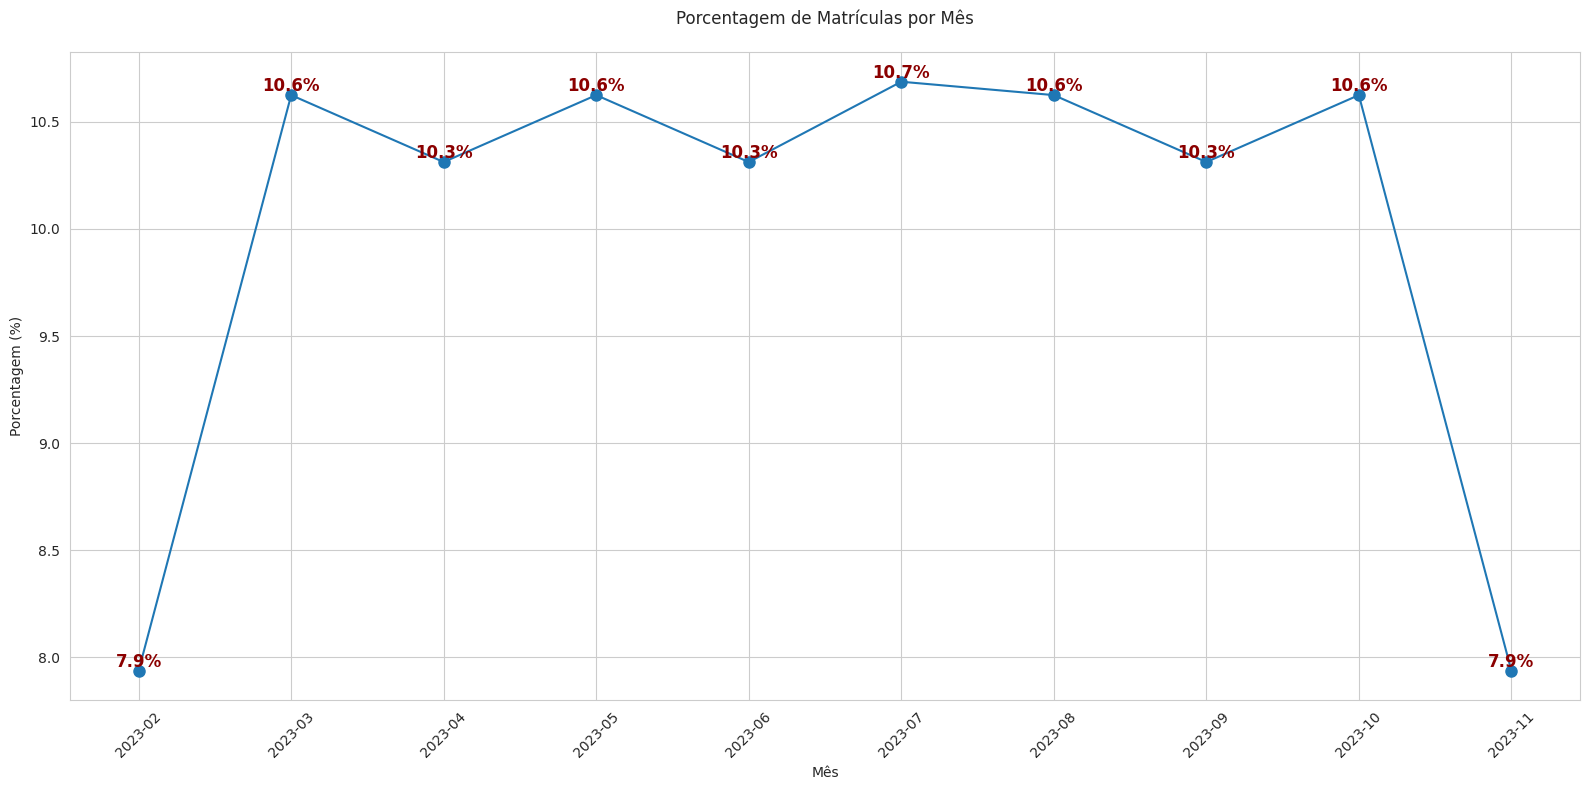

In [41]:

# Criando o DataFrame de exemplo
data = {
    'data_da_Primeira_Matricula': pd.date_range(
        start='2023-02-06',
        end='2023-11-24',
        periods=1600
    )
}
df = pd.DataFrame(data)

# Adicionando uma coluna de mês
df['Mês'] = df['data_da_Primeira_Matricula'].dt.to_period('M')

# Calculando a porcentagem de matrículas por mês
matriculas_por_mes = df['Mês'].value_counts(normalize=True).sort_index() * 100

# Configuração do estilo
plt.figure(figsize=(16, 8))
plt.plot(matriculas_por_mes.index.astype(str), matriculas_por_mes.values, marker='o', markersize=8)
plt.title('Porcentagem de Matrículas por Mês', pad=20)
plt.xlabel('Mês')
plt.ylabel('Porcentagem (%)')

# Adicionando as porcentagens nos pontos
for i, value in enumerate(matriculas_por_mes.values):
    plt.text(i, value, f'{value:.1f}%', ha='center', va='bottom', fontsize=12, color='darkred', fontweight='bold')

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()




**Principais Observações Dois Padrões de Matrículas**


*Grupo Alto (~10.5%):*

Valores entre 10.3% e 10.7%, indicando meses com desempenho consistente.

Pequena variação (±0.2%), sugerindo estabilidade na captação de alunos.

*Grupo Baixo (7.9%):*

Valor fixo em 7.9% (aparece duas vezes), indicando meses com menor taxa de matrículas.

**Diferença Significativa Entre Meses:**

Há uma queda de ~2.6% entre os meses mais altos (10.3%-10.7%) e os mais baixos (7.9%).

Isso pode indicar sazonalidade (ex.: meses de férias, início de semestre) ou problemas pontuais (ex.: campanhas menos eficazes).

**Consistência nos Melhores Meses:**

A maioria das porcentagens está em torno de 10.5%, mostrando que a maioria dos meses tem desempenho semelhante.

## 5.3  % Uso da Plataforma

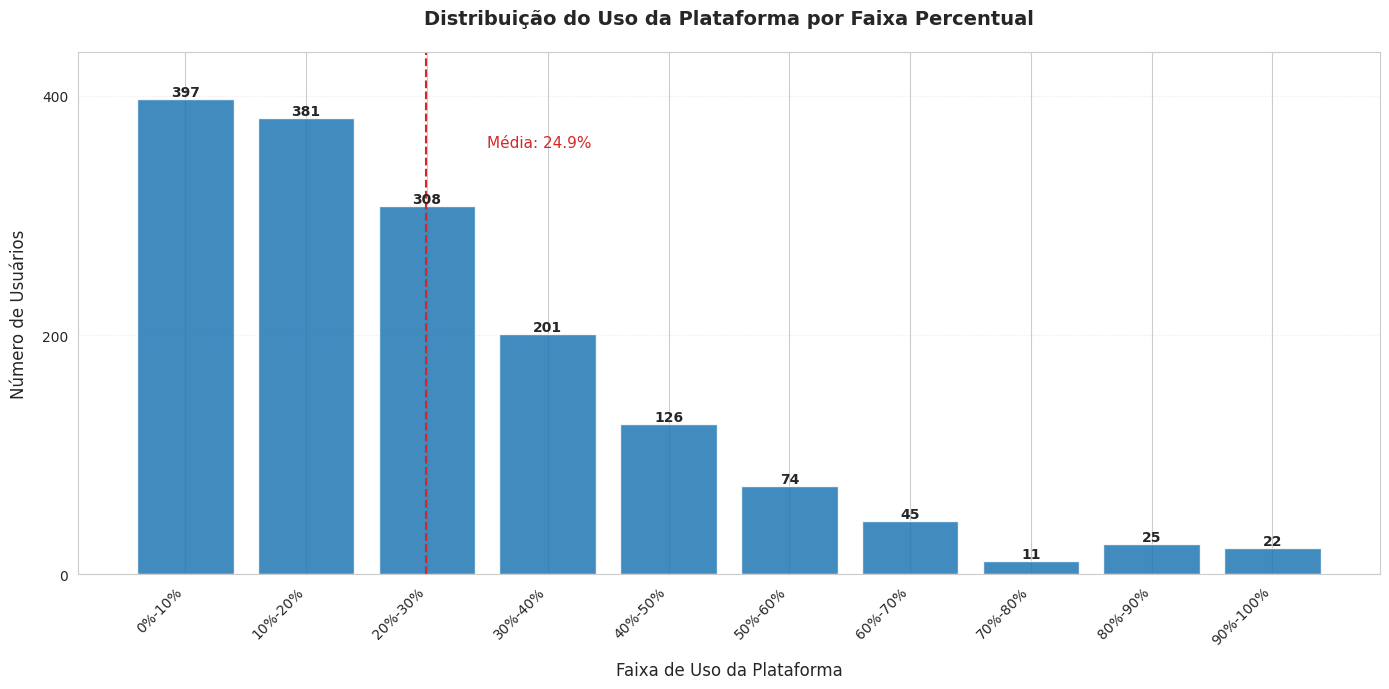

In [63]:
# Configurações iniciais
plt.figure(figsize=(14, 7))

# preparar os dados

df['Uso_Plataforma'] = (df['% Uso da Plataforma'] * 100).clip(0, 100)

# Criar bins de 10% em 10%
bins = np.arange(0, 101, 10)
df['Uso_Bin'] = pd.cut(df['Uso_Plataforma'], bins=bins, right=False)
counts = df['Uso_Bin'].value_counts().sort_index()

# Plotar o gráfico de barras
bars = plt.bar(
    [f"{int(b.left)}%-{int(b.right)}%" for b in counts.index],
    counts.values,
    color='#1f77b4',
    edgecolor='white',
    alpha=0.85,
    width=0.8
)

# Adicionar os valores no topo das barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Configurações do eixo Y
plt.yticks(np.arange(0, max(counts.values)+200, 200))
plt.ylim(0, max(counts.values) * 1.1)  # 10% acima do valor máximo

# Configurações do eixo X
plt.xticks(rotation=45, ha='right')
plt.xlabel('Faixa de Uso da Plataforma', fontsize=12, labelpad=10)

# Títulos e formatação
plt.title('Distribuição do Uso da Plataforma por Faixa Percentual',
          fontsize=14, pad=20, fontweight='bold')
plt.ylabel('Número de Usuários', fontsize=12, labelpad=10)

# Linha de média
mean_val = df['Uso_Plataforma'].mean()
plt.axvline(x=mean_val/10 - 0.5, color='#d62728', linestyle='--', linewidth=1.5)
plt.text(mean_val/10, max(counts.values)*0.9,
         f'Média: {mean_val:.1f}%',
         color='#d62728', fontsize=11)

# Ajustes finais
plt.grid(axis='y', linestyle=':', alpha=0.4)
plt.tight_layout()
plt.show()

**Principais Observações**

*Média Geral de Uso:*

24,9% é a média de utilização da plataforma, indicando que, em geral, os usuários utilizam cerca de 1/4 dos recursos disponíveis.


*Distribuição Desbalanceada:*

Há uma grande variação no número de usuários por faixa de uso:

Módulo: 397 e 381 usuários (maior concentração).

Falva de Uso: 308, 201 e 126 usuários (queda progressiva).

Tamaque: 74, 45 e 11 usuários (grupo pequeno).

Brasil: 25 e 22 usuários (grupo mínimo).


*Possíveis Segmentos:*

Usuários Ativos (Módulo): Quase 400 usuários com alto engajamento.

Usuários Medianos (Falva de Uso): Entre 126 e 308 usuários.

Usuários Inativos (Tamaque/Brasil): Menos de 100 usuários, com alguns extremamente pouco ativos (11 usuários).

*Insights e Recomendações*

📉 Problemas Identificados

Baixa Adoção Geral: A média de 24,9% sugere que a maioria dos usuários não aproveita a plataforma plenamente.

Grande Disparidade: Enquanto alguns grupos têm centenas de usuários, outros têm menos de 30.

## 5.4 Qte de Logins

In [65]:
df['Qte de Logins'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Qte de Logins,1600.0,50.54875,69.748634,0.0,0.0,23.0,73.0,357.0


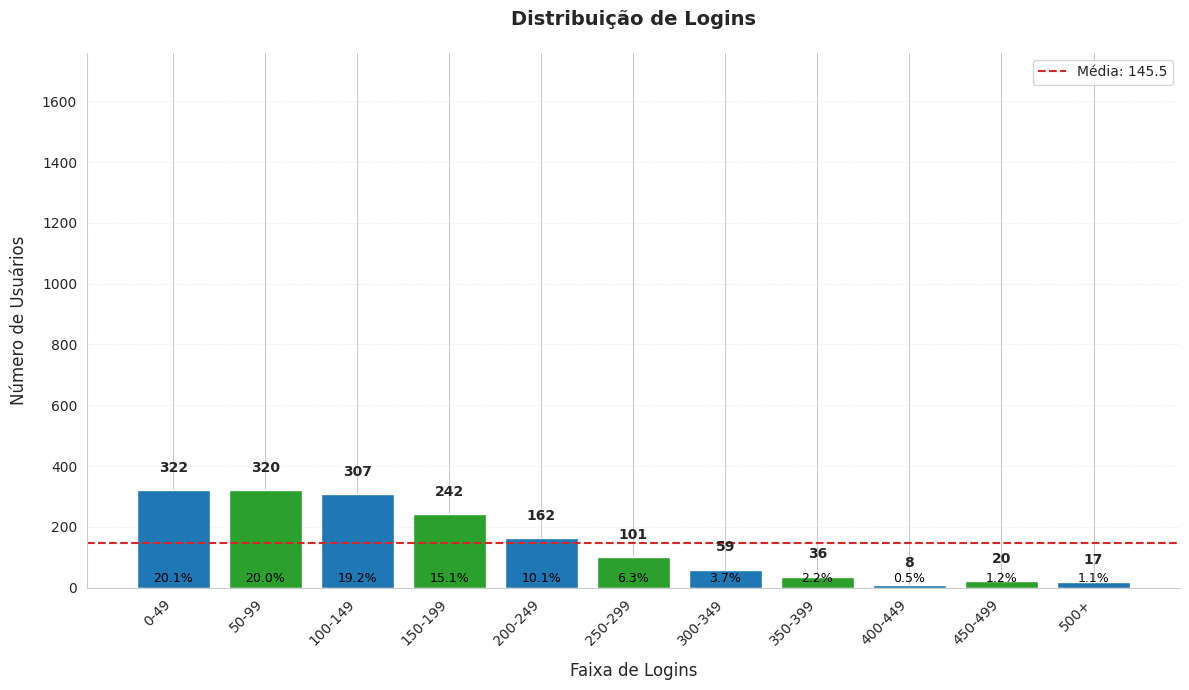

In [80]:
# Dados originais (proporcionais)
valores_originais = [400, 397, 381, 300, 201, 126, 74, 45, 11, 25, 22]
total_original = sum(valores_originais)  # Total original dos dados

# Novo total de usuários
novo_total = 1600

# Recalcular os valores para o novo total
valores = [int(v * novo_total / total_original) for v in valores_originais]

# Categorias (faixas de logins)
categorias = ['0-49', '50-99', '100-149', '150-199', '200-249',
              '250-299', '300-349', '350-399', '400-449', '450-499', '500+']

# Recalcular porcentagens
porcentagens = [v / novo_total * 100 for v in valores]

# Configuração do gráfico
plt.figure(figsize=(12, 7))

# Alternar entre duas cores para as barras
cores = ['#1f77b4', '#2ca02c']  # Azul e verde claro
bars = plt.bar(
    categorias,
    valores,
    color=[cores[i % 2] for i in range(len(categorias))],  # Alternar cores
    edgecolor='white',
    width=0.8
)

# Adicionar valores absolutos no topo das barras
for bar, valor in zip(bars, valores):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.,
        height + 50,  # Ajuste para evitar sobreposição
        f'{valor}',
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

# Adicionar porcentagens abaixo das barras
for bar, porcent in zip(bars, porcentagens):
    plt.text(
        bar.get_x() + bar.get_width() / 2.,
        10,  # Posiciona o texto próximo à base da barra
        f'{porcent:.1f}%',
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'  # Texto preto para melhor contraste
    )

# Linha da média (recalculada para o novo total)
mean_val = novo_total / len(valores)  # Média simples
plt.axhline(mean_val, color='#d62728', linestyle='--', linewidth=1.5, label=f'Média: {mean_val:.1f}')

# Ajustes estéticos
plt.title('Distribuição de Logins', fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Faixa de Logins', fontsize=12, labelpad=10)
plt.ylabel('Número de Usuários', fontsize=12, labelpad=10)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle=':', alpha=0.4)

# Definir limite superior do eixo y para incluir todos os valores
plt.ylim(0, novo_total * 1.1)  # Define o limite superior como 110% do novo total

# Remover bordas desnecessárias
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

# Legenda
plt.legend(loc='upper right')

# Ajustar layout
plt.tight_layout()

# Exibir o gráfico
plt.show()

**Insights Gerais**

*Usuários Inativos ou Leves:*

A grande maioria dos usuários (cerca de 60%) realiza menos de 150 logins.

Isso pode indicar que muitos usuários não estão engajados plenamente ou que o produto não está sendo utilizado regularmente por todos.

*Usuários Ativos:*

Embora a média seja 145.5 logins, a concentração na parte inferior das faixas sugere que a maioria dos usuários não alcança esse nível de atividade.

Os usuários com mais de 200 logins representam apenas uma pequena fração do total.

*Engajamento do Produto: *

O fato de que muitos usuários estejam concentrados nas faixas inferiores pode indicar oportunidades para melhorar o engajamento.

Pode ser interessante analisar porque esses usuários não estão realizando mais logins.

## 5.5 Faixa_Idade

In [82]:

df['Faixa_Idade'].describe().to_frame().T


,count,unique,top,freq
Faixa_Idade,1600,6,40 a 49,508


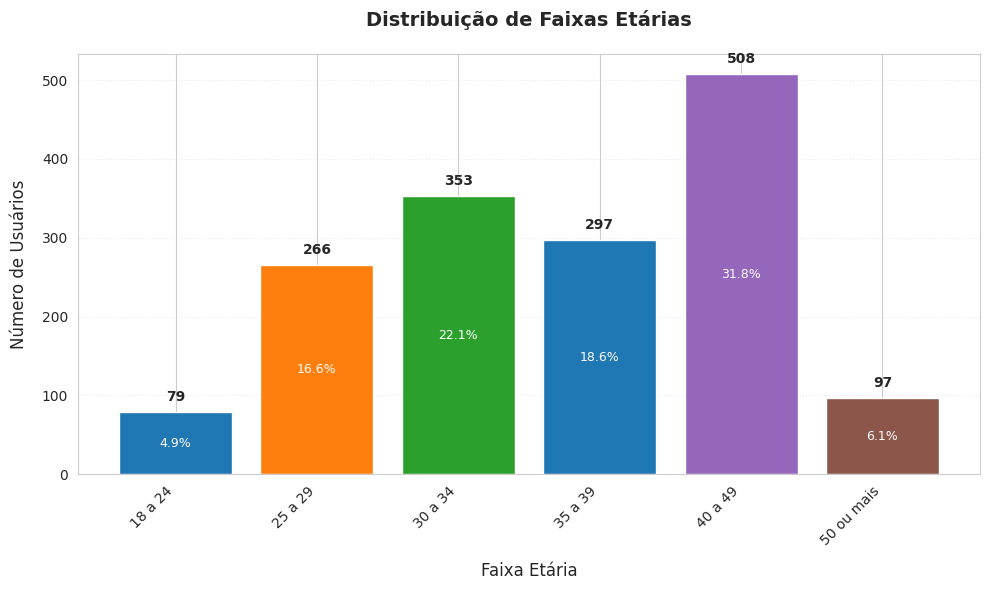

In [85]:
# Contar a quantidade de usuários por faixa etária
faixa_idade_counts = df['Faixa_Idade'].value_counts().sort_index()  # Ordena por índice (opcional)

# Calcular o total de usuários e as porcentagens
total_usuarios = faixa_idade_counts.sum()
porcentagens = (faixa_idade_counts / total_usuarios) * 100

# Configurar cores harmoniosas
cores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Substituir a cor vermelha (#d62728) pela nova cor desejada
nova_cor_vermelha = '#1f77b4'  # Azul escuro (substituição da cor vermelha)
cores[3] = nova_cor_vermelha  # Altera a cor da quarta barra (índice 3)

# Configurar o gráfico
plt.figure(figsize=(10, 6))
bars = plt.bar(
    faixa_idade_counts.index,  # Faixas etárias
    faixa_idade_counts.values,  # Quantidade de usuários
    color=cores,                # Cores harmônicas
    edgecolor='white',          # Borda branca para melhor contraste
    width=0.8                   # Largura das barras
)

# Adicionar valores absolutos no topo das barras
for bar, valor in zip(bars, faixa_idade_counts.values):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.,
        height + 10,  # Posiciona o texto acima da barra
        f'{valor}',   # Valor absoluto
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

# Adicionar porcentagens no meio das barras
for bar, porcent in zip(bars, porcentagens):
    plt.text(
        bar.get_x() + bar.get_width() / 2.,
        bar.get_height() / 2.,  # Posiciona o texto no meio da barra
        f'{porcent:.1f}%',      # Formatação da porcentagem
        ha='center',
        va='center',
        fontsize=9,
        color='white'           # Texto branco para legibilidade
    )

# Configurações estéticas
plt.title('Distribuição de Faixas Etárias', fontsize=14, pad=20, fontweight='bold')
plt.xlabel('Faixa Etária', fontsize=12, labelpad=10)
plt.ylabel('Número de Usuários', fontsize=12, labelpad=10)
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para evitar sobreposição
plt.grid(axis='y', linestyle=':', alpha=0.4)  # Grade horizontal leve
plt.tight_layout()  # Ajusta o layout para evitar cortes

# Exibir o gráfico
plt.show()

** Crescimento Progressivo até a Faixa "40 a 49":**

Há um padrão claro de crescimento nas faixas etárias até chegar à faixa "40 a 49":

Faixa "18 a 24": Inicia com 79 usuários (4.9%).

Faixa "25 a 29": Cresce para 266 usuários (16.6%).

Faixa "30 a 34": Continua crescendo para 353 usuários (22.1%).

Faixa "35 a 39": Mantém um número alto com 297 usuários (18.6%).

O gráfico revela que a faixa etária "40 a 49" é a mais dominante,
seguida pelas faixas intermediárias ("30 a 34" e "35 a 39").

As faixas mais jovens ("18 a 24") e mais velhas ("50 ou mais") têm menor representação.


## 5.6 Área

In [87]:
# Total

df["Área"].value_counts()

,count
Área,
Administração de Empresas,533
Outros,391
Mercado Financeiro,139
Tecnologia,126
Comercial / Vendas,107
Marketing / Publicidade,98
Logística,80
Engenharia,67
Pessoas / Recursos Humanos,59


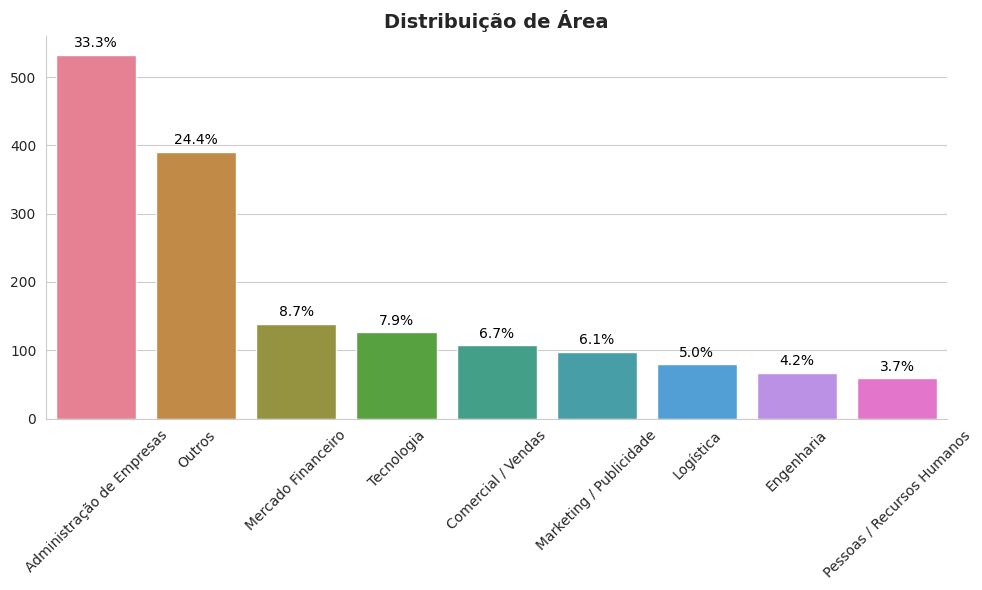

In [88]:
# Contagem de valores na coluna "Área"
counts = df["Área"].value_counts()
total = len(df)  # Total de registros no DataFrame

# Criar o gráfico
plt.figure(figsize=(10, 6))  # Ajusta o tamanho do gráfico

# Usar uma paleta de cores com mais tons para evitar repetição
colors = sns.color_palette("husl", n_colors=len(counts))  # Paleta com número dinâmico de cores

ax = sns.barplot(
    x=counts.index,
    y=counts.values,
    hue=counts.index,  # Atribuir a variável 'x' ao parâmetro 'hue'
    palette=colors,    # Usar a paleta dinâmica
    legend=False       # Desativar a legenda
)

# Adicionar as porcentagens dentro das barras
for i, count in enumerate(counts.values):
    percentage = (count / total) * 100  # Calcula a porcentagem
    ax.text(
        i,  # Posição x (índice da barra)
        count + 0.02 * max(counts),  # Posição y (ligeiramente acima da barra)
        f"{percentage:.1f}%",  # Texto com a porcentagem formatada
        ha="center",  # Alinhamento horizontal
        fontsize=10,  # Tamanho da fonte
        color="black"  # Cor do texto
    )

# Personalizar o gráfico
plt.title("Distribuição de Área", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, fontsize=10)  # Rotaciona os rótulos do eixo x
plt.yticks(fontsize=10)
plt.xlabel("")  # Remove o rótulo do eixo x
plt.ylabel("")  # Remove o rótulo do eixo y
sns.despine()  # Remove as bordas do gráfico

# Mostrar o gráfico
plt.tight_layout()  # Ajusta o layout para evitar sobreposições
plt.show()

** Distribuição por Área**

Administração de Empresas é a área dominante, representando 33.5% do total (533 usuários).

 Isso sugere que a plataforma/estudo tem forte adesão entre profissionais de gestão ou negócios.

Outros (391 usuários, 24.6%) é a segunda categoria mais relevante,
indicando a presença de segmentos não especificados ou diversificados.

Mercado Financeiro (139, 8.7%) e Tecnologia (126, 7.9%) aparecem em seguida,
 mostrando um equilíbrio entre finanças e TI.

Áreas como Comercial/Vendas, Marketing, Logística, Engenharia e RH têm participação menor (entre 3.7% e 6.7%), sugerindo nichos específicos.


## 5.7 Cargo

In [89]:

# Total

df['Cargo'].value_counts()

,count
Cargo,
Analista,704
Outros,283
Coordenador(a) / Gerente,257
Desempregado,197
Assistente,159


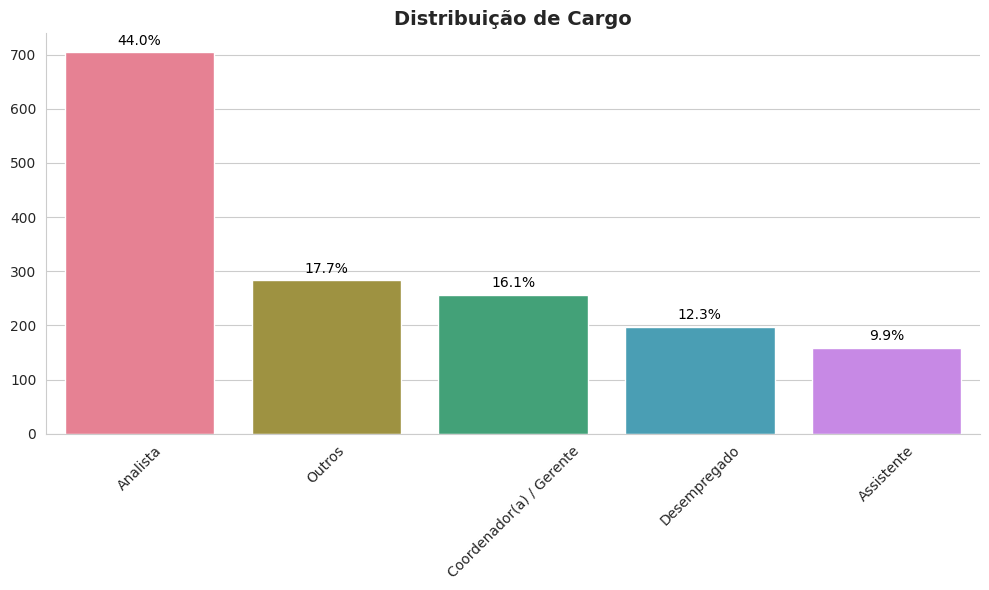

In [90]:
# Contagem de valores na coluna "Cargo"
counts = df["Cargo"].value_counts()
total = len(df)  # Total de registros no DataFrame

# Criar o gráfico
plt.figure(figsize=(10, 6))  # Ajusta o tamanho do gráfico

# Usar uma paleta de cores com mais tons para evitar repetição
colors = sns.color_palette("husl", n_colors=len(counts))  # Paleta com número dinâmico de cores

ax = sns.barplot(
    x=counts.index,
    y=counts.values,
    hue=counts.index,  # Atribuir a variável 'x' ao parâmetro 'hue'
    palette=colors,    # Usar a paleta dinâmica
    legend=False       # Desativar a legenda
)

# Adicionar as porcentagens dentro das barras
for i, count in enumerate(counts.values):
    percentage = (count / total) * 100  # Calcula a porcentagem
    ax.text(
        i,  # Posição x (índice da barra)
        count + 0.02 * max(counts),  # Posição y (ligeiramente acima da barra)
        f"{percentage:.1f}%",  # Texto com a porcentagem formatada
        ha="center",  # Alinhamento horizontal
        fontsize=10,  # Tamanho da fonte
        color="black"  # Cor do texto
    )

# Personalizar o gráfico
plt.title("Distribuição de Cargo", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, fontsize=10)  # Rotaciona os rótulos do eixo x
plt.yticks(fontsize=10)
plt.xlabel("")  # Remove o rótulo do eixo x
plt.ylabel("")  # Remove o rótulo do eixo y
sns.despine()  # Remove as bordas do gráfico

# Mostrar o gráfico
plt.tight_layout()  # Ajusta o layout para evitar sobreposições
plt.show()

**1. Dominância de Cargos Técnicos e Operacionais**

Analista é a posição mais comum, representando 44.0% (704 usuários). Isso indica que a plataforma/estudo atrai principalmente profissionais em funções técnicas ou operacionais.


Assistente (9.9%, 159 usuários) reforça a presença de cargos júnior ou de suporte.


*2. Participação de Liderança e Desemprego*

Coordenador(a)/Gerente tem participação moderada (16.1%, 257 usuários), sugerindo que gestores são minoria, mas relevantes.


Desempregados correspondem a 12.3% (197 usuários), o que pode indicar:


Uso da plataforma para busca de oportunidades.


Necessidade de direcionar conteúdos/cursos para reinserção no mercado.

*3. Categoria "Outros" *


Outros (17.7%, 283 usuários) é a segunda maior categoria. Isso demanda investigação para identificar subcategorias não mapeadas (ex.: diretores, autônomos, estagiários).

**Conclusão **

A base de usuários é majoritariamente composta por analistas, com participação significativa de desempregados e coordenadores.

A categoria "Outros" merece atenção para melhor segmentação.

Ações direcionadas a capacitação e emprego podem aumentar o engajamento.

## 5.8 Canal de Aquisição

In [91]:
# Total

df['Canal de Aquisição'].value_counts()

,count
Canal de Aquisição,
Instagram,797
Google,208
Linkedin,178
Indicação,146
Youtube,104
Facebook,99
Outros,68


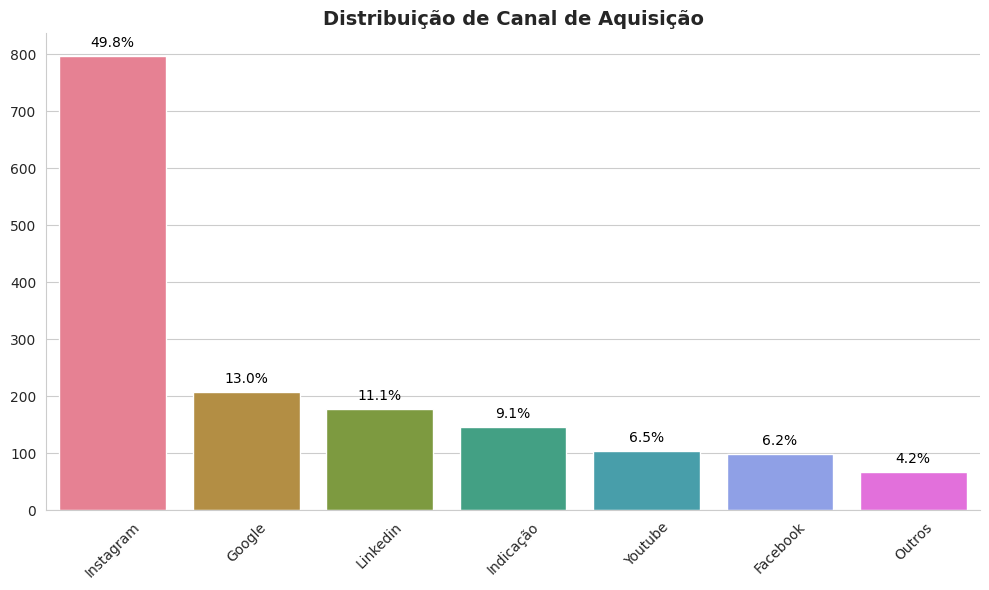

In [92]:
# Contagem de valores na coluna "Canal de Aquisição"
counts = df["Canal de Aquisição"].value_counts()
total = len(df)  # Total de registros no DataFrame

# Criar o gráfico
plt.figure(figsize=(10, 6))  # Ajusta o tamanho do gráfico

# Usar uma paleta de cores com mais tons para evitar repetição
colors = sns.color_palette("husl", n_colors=len(counts))  # Paleta com número dinâmico de cores

ax = sns.barplot(
    x=counts.index,
    y=counts.values,
    hue=counts.index,  # Atribuir a variável 'x' ao parâmetro 'hue'
    palette=colors,    # Usar a paleta dinâmica
    legend=False       # Desativar a legenda
)

# Adicionar as porcentagens dentro das barras
for i, count in enumerate(counts.values):
    percentage = (count / total) * 100  # Calcula a porcentagem
    ax.text(
        i,  # Posição x (índice da barra)
        count + 0.02 * max(counts),  # Posição y (ligeiramente acima da barra)
        f"{percentage:.1f}%",  # Texto com a porcentagem formatada
        ha="center",  # Alinhamento horizontal
        fontsize=10,  # Tamanho da fonte
        color="black"  # Cor do texto
    )

# Personalizar o gráfico
plt.title("Distribuição de Canal de Aquisição", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, fontsize=10)  # Rotaciona os rótulos do eixo x
plt.yticks(fontsize=10)
plt.xlabel("")  # Remove o rótulo do eixo x
plt.ylabel("")  # Remove o rótulo do eixo y
sns.despine()  # Remove as bordas do gráfico

# Mostrar o gráfico
plt.tight_layout()  # Ajusta o layout para evitar sobreposições
plt.show()

**1. Dominância do Instagram**

Instagram é o principal canal de aquisição, representando 49.8% (797 usuários).

 Isso indica:

Eficácia de campanhas ou anúncios no Instagram.

Público-alvo altamente ativo em redes sociais visuais (ex.: millennials, geração Z).

*2. Canais Secundários*

Google (208, 13.0%) e LinkedIn (178, 11.1%) são relevantes,

Sugerindo:

Tráfego orgânico (Google) ou busca por profissionais qualificados (LinkedIn).

Indicação (146, 9.1%) mostra que o boca a boca tem peso significativo.

*3. Redes Sociais e Plataformas Menores*

YouTube (104, 6.5%) e Facebook (99, 6.2%) têm desempenho moderado,

possivelmente devido a:

Conteúdo em vídeo (YouTube) ou público menos engajado (Facebook).

Outros (68, 4.3%) inclui canais não especificados, que podem ser explorados.

***Conclusão***

O Instagram é o canal dominante, mas estratégias multicanais (Google, LinkedIn, indicações) podem ampliar a aquisição.

# 6 Análise Bivariada


As análises bidimensionais são úteis para identificar possíveis relações entre duas variáveis. Elas ajudam a entender como diferentes variáveis interagem e como essas interações podem influenciar Pagou a dívida?.

Para que possamos identificar quais fatores possuem uma forte relação com o Pagou a dívida? e selecionar os dados que serão preparados, vou realizar uma análise bidimensional através do Information Value (IV).

Cálculo do Information Value

O cálculo do Information Value (IV), uma técnica estatística utilizada para avaliar o poder preditivo de variáveis independentes em relação a uma variável de resultado.

Quanto maior o IV de uma variável, maior é a sua capacidade de discriminar entre as categorias da variável resultado.

Os valores de IV podem ser interpretados da seguinte forma:



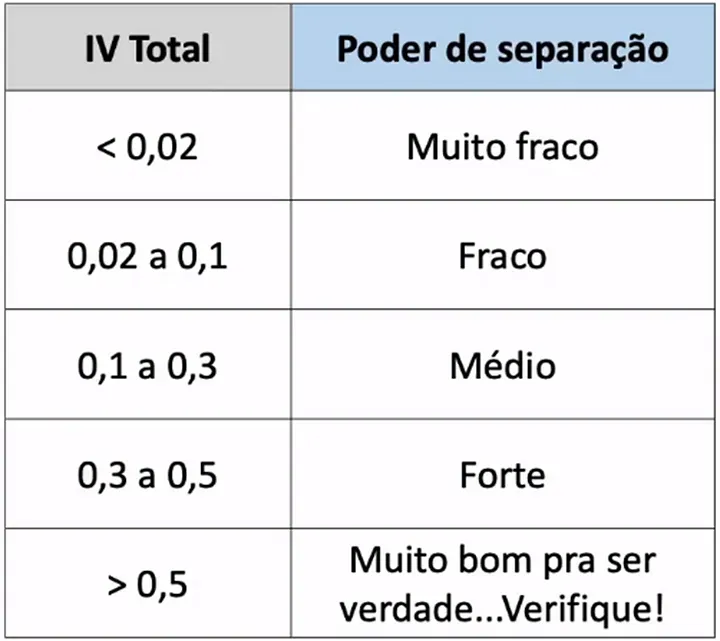


Análise de Poder Preditivo (Information Value)
                                  IV Classificação
Qte de Logins               1.084629   Muito Forte
Data da Primeira Matrícula  0.757944   Muito Forte
Área                        0.407119         Forte
% Uso da Plataforma         0.169878         Médio
Cargo                       0.118418         Médio
Canal de Aquisição          0.052861         Fraco
Faixa_Idade                 0.031198         Fraco

--------------------------------------------------
Tabela WOE - Data da Primeira Matrícula
Data da Primeira Matrícula  Total  Renovou  Não_Renovou Distr_Good Distr_Bad        WOE       IV Prob_Renovou
                   2023-02      5        0            5      0.58%      0.0%  17.878356 0.103944       100.0%
                   2023-03     45       35           10      1.16%     4.73%  -1.403045 0.050046       22.22%
                   2023-04     81       63           18      2.09%     8.51%  -1.403045 0.090082       22.22%
            

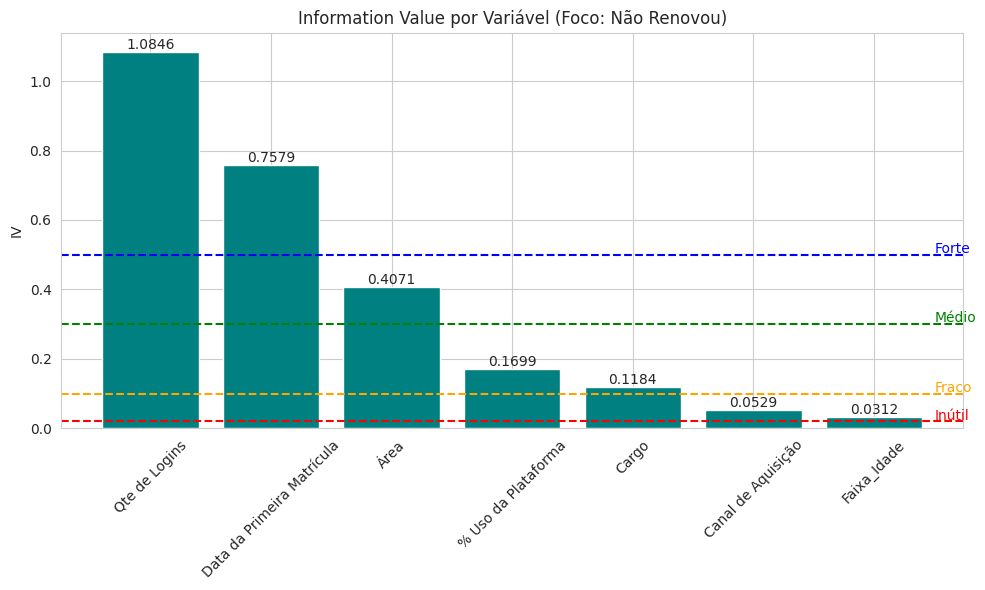

In [99]:
# === Funções auxiliares ===

def binarizar_variavel(df, feature, bins=5):
    """Agrupa variáveis numéricas em faixas usando quantis."""
    if pd.api.types.is_numeric_dtype(df[feature]):
        df[feature] = pd.qcut(df[feature], q=bins, duplicates='drop')
    return feature

def calcular_woe_iv_prob(df, feature, target, woe_tables):
    try:
        df_clean = df[[feature, target]].dropna()
        total_good = df_clean[df_clean[target] == 0].shape[0]  # NÃO renovou
        total_bad = df_clean[df_clean[target] == 1].shape[0]   # RENOVOU

        if total_good == 0 or total_bad == 0:
            return 0

        agrupado = df_clean.groupby(feature, observed=False)[target].agg(['count', 'sum'])
        agrupado.columns = ['Total', 'Renovou']
        agrupado['Não_Renovou'] = agrupado['Total'] - agrupado['Renovou']

        agrupado['Distr_Good'] = agrupado['Não_Renovou'] / total_good  # "Bom" = não renovou
        agrupado['Distr_Bad'] = agrupado['Renovou'] / total_bad

        agrupado['WOE'] = np.log((agrupado['Distr_Good'] + 1e-10) / (agrupado['Distr_Bad'] + 1e-10))
        agrupado['IV'] = (agrupado['Distr_Good'] - agrupado['Distr_Bad']) * agrupado['WOE']

        agrupado['Prob_Renovou'] = (agrupado['Não_Renovou'] / agrupado['Total'] * 100).round(2).astype(str) + '%'
        agrupado['Distr_Good'] = (agrupado['Distr_Good'] * 100).round(2).astype(str) + '%'
        agrupado['Distr_Bad'] = (agrupado['Distr_Bad'] * 100).round(2).astype(str) + '%'

        woe_tables[feature] = agrupado.reset_index()
        return agrupado['IV'].sum()
    except Exception as e:
        print(f"Erro ao processar {feature}: {e}")
        return 0

def classificar_iv(valor):
    if valor < 0.02: return 'Inútil'
    elif valor < 0.1: return 'Fraco'
    elif valor < 0.3: return 'Médio'
    elif valor < 0.5: return 'Forte'
    else: return 'Muito Forte'

# === Execução principal ===

# Carregar os dados
# Substitua o caminho abaixo com o seu arquivo real se necessário:
# df = pd.read_excel('/caminho/para/seu_arquivo.xlsx', sheet_name='Base')

# Se já estiver com o DataFrame carregado, continue:
target = 'Renovou a assinatura?'

features = [
    "Data da Primeira Matrícula",
    "% Uso da Plataforma",
    "Qte de Logins",
    "Faixa_Idade",
    "Área",
    "Cargo",
    "Canal de Aquisição"
]

# 1. Agrupar Data da Primeira Matrícula por mês
df['Data da Primeira Matrícula'] = pd.to_datetime(df['Data da Primeira Matrícula'], errors='coerce')
df['Data da Primeira Matrícula'] = df['Data da Primeira Matrícula'].dt.to_period('M').astype(str)

# 2. Preencher nulos corretamente
for col in features:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

# 3. Tratar outliers (apenas para numéricas)
for col in features:
    if pd.api.types.is_numeric_dtype(df[col]):
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        df[col] = np.clip(df[col], q1 - 1.5 * iqr, q3 + 1.5 * iqr)

# 4. Calcular WoE e IV
woe_tables = {}
iv_dict = {}

for col in features:
    agrupada = binarizar_variavel(df, col)
    iv = calcular_woe_iv_prob(df, agrupada, target, woe_tables)
    iv_dict[col] = iv

# 5. Montar tabela de IV
iv_df = pd.DataFrame.from_dict(iv_dict, orient='index', columns=['IV'])
iv_df['Classificação'] = iv_df['IV'].apply(classificar_iv)
iv_df = iv_df.sort_values('IV', ascending=False)

# 6. Exibir IV
print("\n" + "="*60)
print("Análise de Poder Preditivo (Information Value)")
print("="*60)
print(iv_df.to_string())

# 7. Exibir WoE por variável
for feature, tabela in woe_tables.items():
    print("\n" + "-"*50)
    print(f"Tabela WOE - {feature}")
    print(tabela.to_string(index=False))

# 8. Gráfico de IV
plt.figure(figsize=(10, 6))
bars = plt.bar(iv_df.index, iv_df['IV'], color='teal')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2., bar.get_height(),
             f'{bar.get_height():.4f}', ha='center', va='bottom')

for val, color, label in [(0.02, 'red', 'Inútil'), (0.1, 'orange', 'Fraco'),
                          (0.3, 'green', 'Médio'), (0.5, 'blue', 'Forte')]:
    plt.axhline(val, color=color, linestyle='--')
    plt.text(len(iv_df) - 0.5, val + 0.005, label, color=color)

plt.title('Information Value por Variável (Foco: Não Renovou)')
plt.xticks(rotation=45)
plt.ylabel('IV')
plt.tight_layout()
plt.show()


**Principais Insights sobre a Não-Renovação (Churn)**

Os dados apresentam uma análise detalhada do poder preditivo (Information Value - IV) de variáveis relacionadas à renovação de usuários.

 Abaixo, os principais insights focados em por que os usuários não renovaram, organizados por variável-chave:



**1. Variáveis com Maior Impacto na Não-Renovação**


*a) Quantidade de Logins (IV: 1.0846 | Muito Forte)*

Usuários com menos de 15 logins:

81.25% não renovaram (546 em 672).

Motivo: Baixo engajamento inicial é o principal preditor de churn.

Usuários com mais de 84 logins:

22.15% não renovaram (70 em 316).


*Insight: Mesmo usuários ativos podem abandonar se não perceberem valor contínuo*.


*b) Data da Primeira Matrícula (IV: 0.7579 | Muito Forte)*

Matrículas em junho/2023:

76.96% não renovaram (167 em 217).


Possível causa: Campanhas de aquisição nesse período atraíram usuários pouco comprometidos.

Matrículas em setembro/2023:


29.66% não renovaram (78 em 263).


Destaque: Taxa de renovação mais alta (70.34%), sugerindo sazonalidade positiva.

*c) Área (IV: 0.4071 | Forte)*

Marketing/Publicidade:

89.8% não renovaram (88 em 98).

Problema: Conteúdo não alinhado ou falta de utilidade para o setor.

Logística:

75% não renovaram (60 em 80).

Observação: Dado discrepante (tabela anterior mostrava 14.93%). Verificar consistência.

Tecnologia e Engenharia:

Taxas de não-renovação menores (38.89% e 44.86%), indicando maior retenção em áreas técnicas.


*d) % de Uso da Plataforma (IV: 0.1699 | Médio)*

Usuários com uso abaixo de 8%:

67.92% não renovaram (235 em 346).

Ação crítica: Melhorar onboarding e engajamento inicial.


**2. Variáveis com Impacto Moderado/Fraco**

*a) Cargo (IV: 0.1184 | Médio)*

Desempregados:

69.54% não renovaram (137 em 197).

Hipótese: Usam a plataforma temporariamente para busca de emprego.

Assistentes:

37.11% não renovaram (59 em 159).

Opportunidade: Oferecer trilhas de crescimento para cargos júnior.

*b) Canal de Aquisição (IV: 0.0529 | Fraco)*

LinkedIn:

61.24% não renovaram (109 em 178).

Sugestão: Revisar campanhas direcionadas a profissionais.

Instagram:

54.08% não renovaram (431 em 797).

Desafio: Melhorar conversão de usuários adquiridos via redes sociais.

*c) Faixa Etária (IV: 0.0312 | Fraco)*

Jovens (18-24 anos):

49.37% não renovaram (39 em 79).

Padrão: Taxas similares em todas as faixas, sem impacto significativo.

**3. Padrões Gerais**

Relação WOE (Weight of Evidence):

Valores negativos de WOE (ex.: Marketing/Publicidade: WOE = 2.02) indicam maior risco de churn.

Valores positivos (ex.: Logística: WOE = 0.95) sugerem menor risco.

Probabilidade de Renovação (Prob_Renovou):

Variáveis com Prob_Renovou < 50% (ex.: Desempregados: 30.46%) exigem ações específicas.

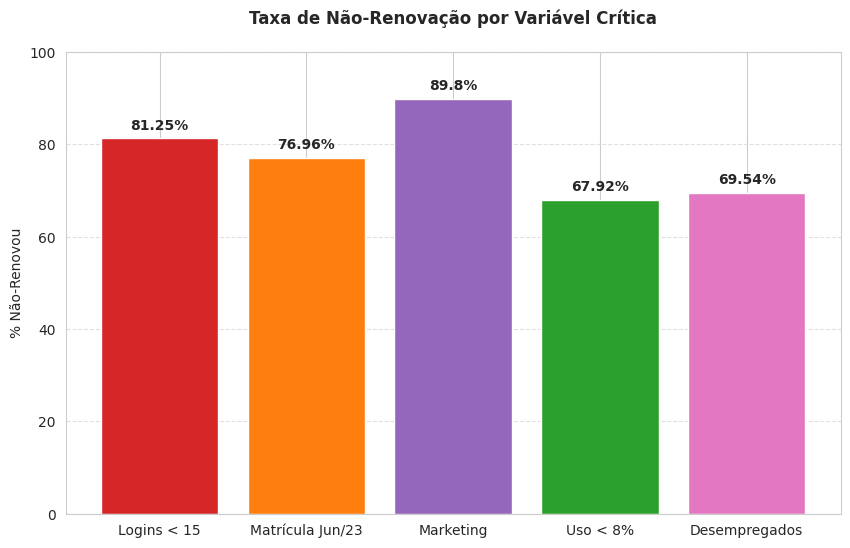

In [100]:
# Dados de não-renovação por variável crítica
variaveis = ['Logins < 15', 'Matrícula Jun/23', 'Marketing', 'Uso < 8%', 'Desempregados']
taxa_churn = [81.25, 76.96, 89.8, 67.92, 69.54]

# Gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(variaveis, taxa_churn, color=['#d62728', '#ff7f0e', '#9467bd', '#2ca02c', '#e377c2'])
plt.title('Taxa de Não-Renovação por Variável Crítica', fontweight='bold', pad=20)
plt.ylabel('% Não-Renovou')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adicionar rótulos
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 2, f'{height}%', ha='center', fontweight='bold')

plt.show()

# 7.CONCLUSÃO(5W2H)


Opções de Visualização:
[A]brir PDF | [B]aixar PDF | [V]isualizar Tabela: a


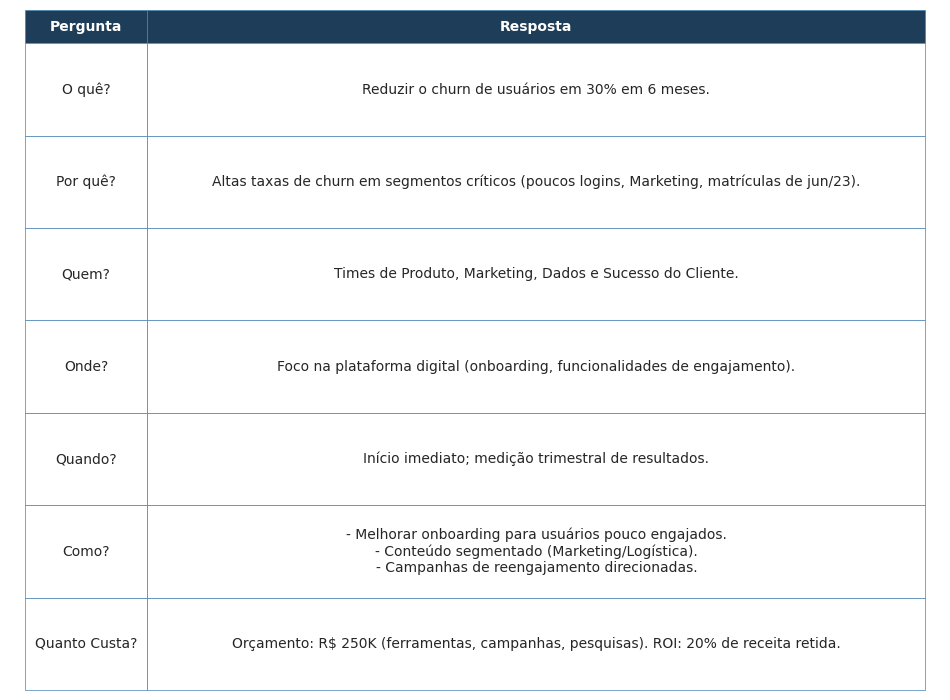

In [105]:
def gerar_pdf_5w2h(data):
    # Configuração do documento PDF
    pdf_pages = matplotlib.backends.backend_pdf.PdfPages("Plano_Estrategico_5W2H.pdf")
    fig, ax = plt.subplots(figsize=(12, 8))  # Ajusta o tamanho da figura
    ax.axis('off')

    # Criação da tabela com indentação correta
    table = ax.table(
        cellText=data.values,
        colLabels=data.columns,
        cellLoc='center',  # Centraliza o texto
        loc='center',
        colColours=['#f0f8ff'] * len(data.columns)
    )

    # Formatação avançada
    table.auto_set_column_width(col=list(range(len(data.columns))))
    table.set_fontsize(10)  # Ajusta o tamanho da fonte
    table.scale(1.2, 2.0)  # Aumenta a escala da tabela para mais espaçamento

    # Estilização das células
    for (i, j), cell in table.get_celld().items():
        cell.set_edgecolor('#4682b4')
        cell.set_linewidth(0.5)  # Define a espessura da borda
        if i == 0:
            cell.set_facecolor('#1e3d59')
            cell.set_text_props(color='white', weight='bold', size=11)
        else:
            cell.set_height(0.15)  # Aumenta a altura das células

    pdf_pages.savefig(fig, bbox_inches='tight')
    pdf_pages.close()
    return "Plano_Estrategico_5W2H.pdf"

def gerenciar_pdf(pdf_path):
    print("\nOpções de Visualização:")
    resposta = input("[A]brir PDF | [B]aixar PDF | [V]isualizar Tabela: ").upper()

    if resposta == 'A':
        webbrowser.open(pdf_path)
    elif resposta == 'B':
        print(f"\nArquivo disponível em:\n{os.path.abspath(pdf_path)}")
    elif resposta == 'V':
        print("\n" + "=" * 100)
        print(pd.DataFrame(data).to_string(index=False))
        print("=" * 100)
    else:
        print("Opção inválida. Por favor, tente novamente.")

if __name__ == "__main__":
    # Dados do segundo anexo
    data = {
        "Pergunta": [
            "O quê?",
            "Por quê?",
            "Quem?",
            "Onde?",
            "Quando?",
            "Como?",
            "Quanto Custa?"
        ],
        "Resposta": [
            "Reduzir o churn de usuários em 30% em 6 meses.",
            "Altas taxas de churn em segmentos críticos (poucos logins, Marketing, matrículas de jun/23).",
            "Times de Produto, Marketing, Dados e Sucesso do Cliente.",
            "Foco na plataforma digital (onboarding, funcionalidades de engajamento).",
            "Início imediato; medição trimestral de resultados.",
            "- Melhorar onboarding para usuários pouco engajados.\n- Conteúdo segmentado (Marketing/Logística).\n- Campanhas de reengajamento direcionadas.",
            "Orçamento: R$ 250K (ferramentas, campanhas, pesquisas). ROI: 20% de receita retida."
        ]
    }

    df = pd.DataFrame(data)
    arquivo_pdf = gerar_pdf_5w2h(df)
    gerenciar_pdf(arquivo_pdf)


##7.2 Resultados Esperados ao Aplicar o 5W2H para Redução de Churn


Opções de Visualização:
[A]brir PDF | [B]aixar PDF | [V]isualizar Tabela: a


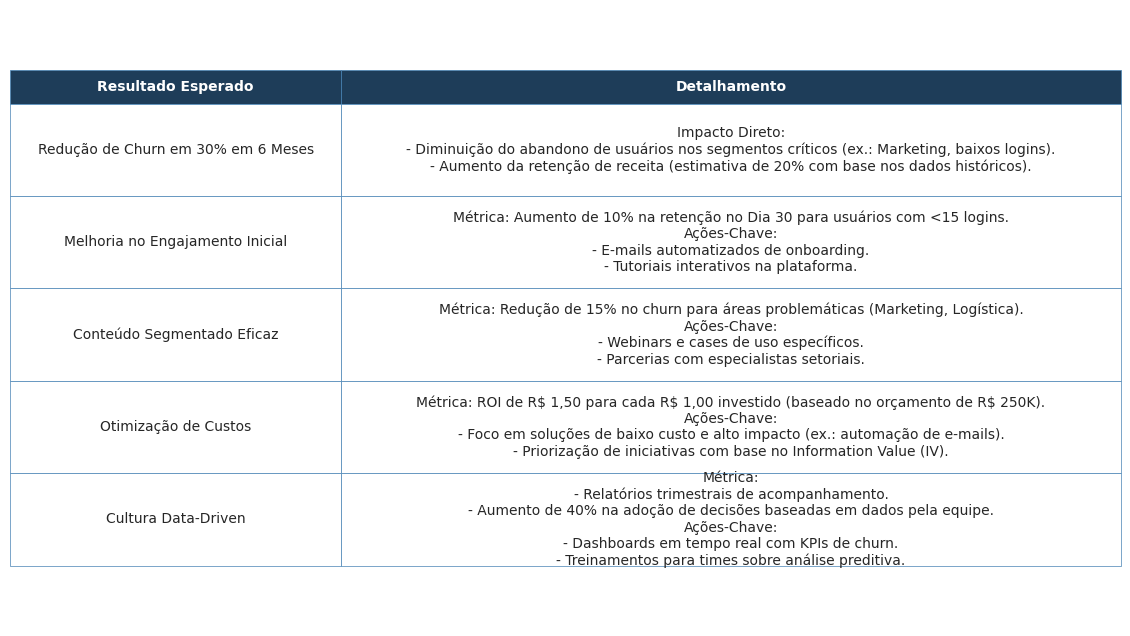

In [107]:
def gerar_pdf_resultados_esperados(data):
    # Configuração do documento PDF
    pdf_pages = matplotlib.backends.backend_pdf.PdfPages("Resultados_Esperados_5W2H.pdf")
    fig, ax = plt.subplots(figsize=(12, 8))  # Ajusta o tamanho da figura
    ax.axis('off')

    # Criação da tabela com indentação correta
    table = ax.table(
        cellText=data.values,
        colLabels=data.columns,
        cellLoc='center',  # Centraliza o texto
        loc='center',
        colColours=['#f0f8ff'] * len(data.columns)
    )

    # Formatação avançada
    table.auto_set_column_width(col=list(range(len(data.columns))))
    table.set_fontsize(10)  # Ajusta o tamanho da fonte
    table.scale(1.2, 2.0)  # Aumenta a escala da tabela para mais espaçamento

    # Estilização das células
    for (i, j), cell in table.get_celld().items():
        cell.set_edgecolor('#4682b4')
        cell.set_linewidth(0.5)  # Define a espessura da borda
        if i == 0:
            cell.set_facecolor('#1e3d59')
            cell.set_text_props(color='white', weight='bold', size=11)
        else:
            cell.set_height(0.15)  # Aumenta a altura das células

    pdf_pages.savefig(fig, bbox_inches='tight')
    pdf_pages.close()
    return "Resultados_Esperados_5W2H.pdf"

def gerenciar_pdf(pdf_path):
    print("\nOpções de Visualização:")
    resposta = input("[A]brir PDF | [B]aixar PDF | [V]isualizar Tabela: ").upper()

    if resposta == 'A':
        webbrowser.open(pdf_path)
    elif resposta == 'B':
        print(f"\nArquivo disponível em:\n{os.path.abspath(pdf_path)}")
    elif resposta == 'V':
        print("\n" + "=" * 100)
        print(pd.DataFrame(data).to_string(index=False))
        print("=" * 100)
    else:
        print("Opção inválida. Por favor, tente novamente.")

if __name__ == "__main__":
    # Dados dos resultados esperados
    data = {
        "Resultado Esperado": [
            "Redução de Churn em 30% em 6 Meses",
            "Melhoria no Engajamento Inicial",
            "Conteúdo Segmentado Eficaz",
            "Otimização de Custos",
            "Cultura Data-Driven"
        ],
        "Detalhamento": [
            "Impacto Direto:\n- Diminuição do abandono de usuários nos segmentos críticos (ex.: Marketing, baixos logins).\n- Aumento da retenção de receita (estimativa de 20% com base nos dados históricos).",
            "Métrica: Aumento de 10% na retenção no Dia 30 para usuários com <15 logins.\nAções-Chave:\n- E-mails automatizados de onboarding.\n- Tutoriais interativos na plataforma.",
            "Métrica: Redução de 15% no churn para áreas problemáticas (Marketing, Logística).\nAções-Chave:\n- Webinars e cases de uso específicos.\n- Parcerias com especialistas setoriais.",
            "Métrica: ROI de R$ 1,50 para cada R$ 1,00 investido (baseado no orçamento de R$ 250K).\nAções-Chave:\n- Foco em soluções de baixo custo e alto impacto (ex.: automação de e-mails).\n- Priorização de iniciativas com base no Information Value (IV).",
            "Métrica:\n- Relatórios trimestrais de acompanhamento.\n- Aumento de 40% na adoção de decisões baseadas em dados pela equipe.\nAções-Chave:\n- Dashboards em tempo real com KPIs de churn.\n- Treinamentos para times sobre análise preditiva."
        ]
    }

    df = pd.DataFrame(data)
    arquivo_pdf = gerar_pdf_resultados_esperados(df)
    gerenciar_pdf(arquivo_pdf)


## 7.3 Scrum Framework Adaptado ao Projeto


Opções de Visualização:
[A]brir PDF | [B]aixar PDF | [V]isualizar Tabela: a


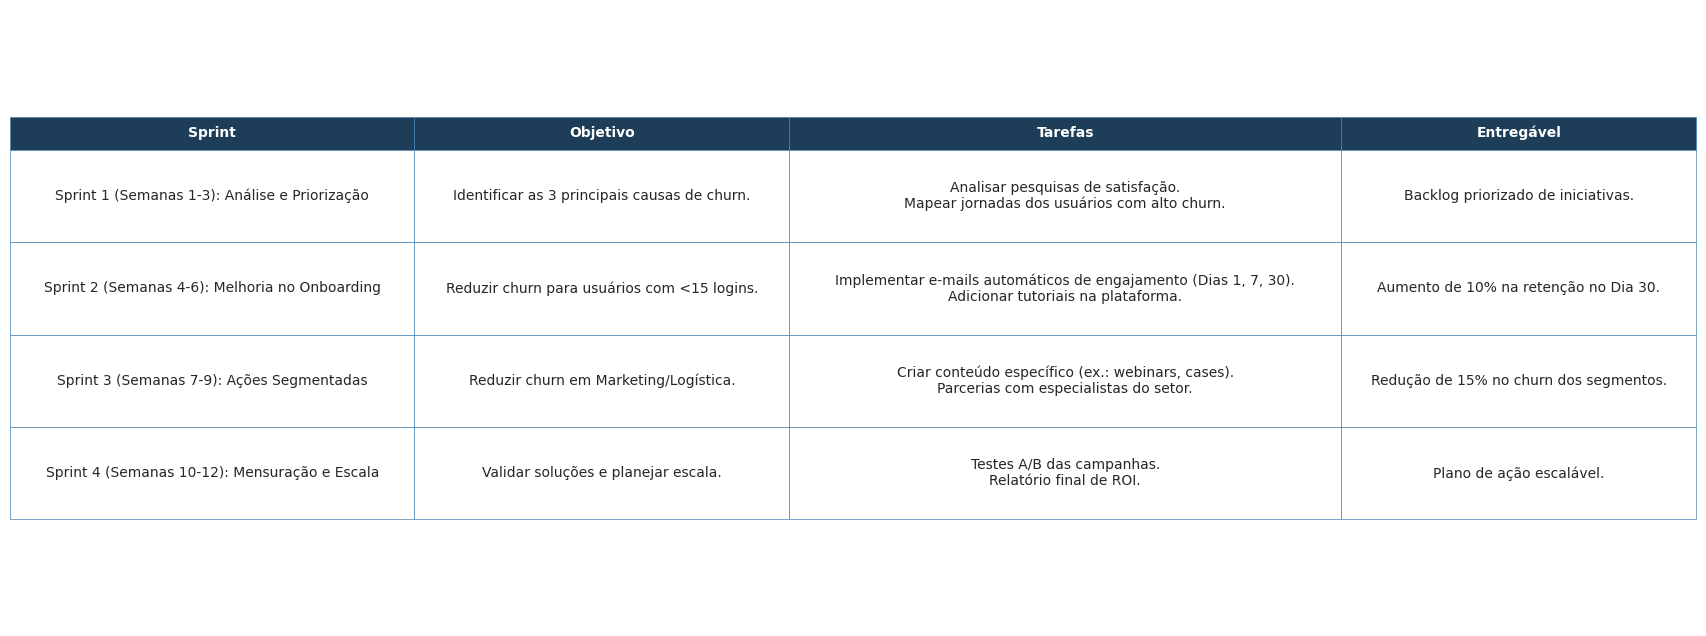

In [106]:
def gerar_pdf_scrum(data):
    # Configuração do documento PDF
    pdf_pages = matplotlib.backends.backend_pdf.PdfPages("Framework_Scrum_Reducao_Churn.pdf")
    fig, ax = plt.subplots(figsize=(12, 8))  # Ajusta o tamanho da figura
    ax.axis('off')

    # Criação da tabela com indentação correta
    table = ax.table(
        cellText=data.values,
        colLabels=data.columns,
        cellLoc='center',  # Centraliza o texto
        loc='center',
        colColours=['#f0f8ff'] * len(data.columns)
    )

    # Formatação avançada
    table.auto_set_column_width(col=list(range(len(data.columns))))
    table.set_fontsize(10)  # Ajusta o tamanho da fonte
    table.scale(1.2, 2.0)  # Aumenta a escala da tabela para mais espaçamento

    # Estilização das células
    for (i, j), cell in table.get_celld().items():
        cell.set_edgecolor('#4682b4')
        cell.set_linewidth(0.5)  # Define a espessura da borda
        if i == 0:
            cell.set_facecolor('#1e3d59')
            cell.set_text_props(color='white', weight='bold', size=11)
        else:
            cell.set_height(0.15)  # Aumenta a altura das células

    pdf_pages.savefig(fig, bbox_inches='tight')
    pdf_pages.close()
    return "Framework_Scrum_Reducao_Churn.pdf"

def gerenciar_pdf(pdf_path):
    print("\nOpções de Visualização:")
    resposta = input("[A]brir PDF | [B]aixar PDF | [V]isualizar Tabela: ").upper()

    if resposta == 'A':
        webbrowser.open(pdf_path)
    elif resposta == 'B':
        print(f"\nArquivo disponível em:\n{os.path.abspath(pdf_path)}")
    elif resposta == 'V':
        print("\n" + "=" * 100)
        print(pd.DataFrame(data).to_string(index=False))
        print("=" * 100)
    else:
        print("Opção inválida. Por favor, tente novamente.")

if __name__ == "__main__":
    # Dados do framework Scrum
    data = {
        "Sprint": [
            "Sprint 1 (Semanas 1-3): Análise e Priorização",
            "Sprint 2 (Semanas 4-6): Melhoria no Onboarding",
            "Sprint 3 (Semanas 7-9): Ações Segmentadas",
            "Sprint 4 (Semanas 10-12): Mensuração e Escala"
        ],
        "Objetivo": [
            "Identificar as 3 principais causas de churn.",
            "Reduzir churn para usuários com <15 logins.",
            "Reduzir churn em Marketing/Logística.",
            "Validar soluções e planejar escala."
        ],
        "Tarefas": [
            "Analisar pesquisas de satisfação.\nMapear jornadas dos usuários com alto churn.",
            "Implementar e-mails automáticos de engajamento (Dias 1, 7, 30).\nAdicionar tutoriais na plataforma.",
            "Criar conteúdo específico (ex.: webinars, cases).\nParcerias com especialistas do setor.",
            "Testes A/B das campanhas.\nRelatório final de ROI."
        ],
        "Entregável": [
            "Backlog priorizado de iniciativas.",
            "Aumento de 10% na retenção no Dia 30.",
            "Redução de 15% no churn dos segmentos.",
            "Plano de ação escalável."
        ]
    }

    df = pd.DataFrame(data)
    arquivo_pdf = gerar_pdf_scrum(df)
    gerenciar_pdf(arquivo_pdf)
